<a href="https://colab.research.google.com/github/VitorFRodrigues/PUCMinas_DataScience/blob/main/06-Machine_Learning/Tarefas/Modulo_A/notebook/aprovacao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Relatório Final: Análise de Aprovação de Cartão de Crédito

Instituição: Pontifícia Universidade Católica de Minas Gerais

Aluno:

1. Vitor Fernando de Souza Rodrigues

Disciplina: Machine Learning

Docente: Cristiano Rodrigues de Carvalho

# 1. Introdução

A cadeira de crédito é composta basicamente de quatro pilares: a prospecção, a concessão, a gestão de risco e a recuperação.

1. **Prospecção**: É o processo de buscar e atrair potenciais clientes ou empresas interessadas em adquirir crédito. Envolve a análise de mercado, identificação de perfis ideais e estratégias de marketing para captar novos clientes.

2. **Concessão**: Nesta fase, a instituição avalia a capacidade de pagamento do cliente, com base em informações financeiras e comportamentais, para decidir sobre a aprovação ou rejeição do crédito solicitado.

3. **Gestão de Risco**: Trata-se do monitoramento e controle dos riscos associados ao crédito concedido. Envolve o acompanhamento contínuo do comportamento de pagamento do cliente, ajustes no limite de crédito e a adoção de medidas preventivas.

4. **Recuperação**: Quando ocorre inadimplência, a instituição foca na recuperação do crédito, utilizando estratégias de cobrança, renegociação de dívidas e, em casos mais graves, ações jurídicas para minimizar perdas.

Este trabalho será basicamente focado em solucionar um problema de concessão de linha de crédito. Pois bem, o uso de crédito tem se tornado uma prática cada vez mais comum entre os brasileiros, impulsionado por diversos fatores econômicos e tecnológicos, dentre eles se destacam:

* **Acesso facilitado ao crédito**: Nos últimos anos, as instituições financeiras expandiram suas ofertas de crédito, com cartões de crédito, crédito consignado e financiamento de bens. Dados do Banco Central do Brasil mostram que o saldo total de crédito no país cresceu significativamente, atingindo níveis históricos.

* **Tecnologia financeira (Fintechs)**: O surgimento de *fintechs* no Brasil democratizou ainda mais o acesso ao crédito. Com aplicativos simplificados e a oferta de serviços online, essas empresas permitem que consumidores tenham acesso a crédito de forma rápida e com menos burocracia, muitas vezes oferecendo taxas mais competitivas que os bancos tradicionais.

* **Pandemia e digitalização**: A pandemia de COVID-19 acelerou o uso de meios digitais de pagamento, incluindo o crédito. Com o aumento das compras online e a necessidade de evitar transações em dinheiro físico, o cartão de crédito e outros mecanismos de crédito digital se tornaram alternativas práticas e seguras para os consumidores.

Esses fatores combinados mostram como o crédito vem se consolidando como uma ferramenta essencial no cotidiano financeiro do brasileiro, facilitando o consumo, mas também apresentando desafios relacionados ao endividamento.

# 2. Descrição do Problema e da Solução Proposta

Basicamente o pedido de crédito funciona a partir da solicitação do cliente a uma Instituição Financeira para pedir algum tipo de crédito, seja cartão, empréstimo consignado, financiamento imobiliário, etc.

A Instituição financeira aprova ou não o pedido do cliente dados alguns critérios específicos. No geral, o banco possui uma série de informações do cliente, deste as quantidades de transações financeiras até status matrimonial são utilizados para identificar um bom ou mal pagador.

Dada estas informações a Instituição aprova ou recusa o fornecimento de crédito para o cliente. Neste trabalho, será utilizado um conjunto de dados extraído do [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) em que receberemos diversas informações de clientes de um banco e seu histórico de transações, indicando se estes possuem um bom relacionamento bancário com pagamentos em dia.

Como solução para este problema, vamos explorar estes dados, criar uma regra para definir o bom e o mal pagador e, por fim, aplicar um modelo preditivo do tipo classificatório para indicar se o futuro solicitante terá seu crédito aprovado ou recusado.


# 3. Coleta de Dados

Conforme dito anteriormente conjunto de dados extraído do [Kaggle](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction) e salvo no [github](https://github.com/VitorFRodrigues/PUCMinas_DataScience/tree/main/06-Machine_Learning/Tarefas/Modulo_A/dados) do autor. A estrutura é formada por tabelas na extensão ```.csv```

## 3.1 Importação de Bibliotecas utilizadas neste Notebook

Este tópico será utilizado para armazenar em uma única célula todas as importações necessárias para o trabalho.

In [77]:
# Instalação de bibliotecas que não estão presentes no pip padrão do colab
# !pip install catboost
# !pip install lightgbm

In [78]:
# Análise de dados
import pandas as pd
import numpy as np

# Vizualização
import matplotlib.pyplot as plt
import seaborn as sns

# Categorização de dados
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy import stats

## 3.2 Importação dos dados e descrição dos datasets

### 3.2.1 Dados dos clientes

In [79]:
URL_appRec = 'https://github.com/VitorFRodrigues/PUCMinas_DataScience/raw/refs/heads/main/06-Machine_Learning/Tarefas/Modulo_A/dados/application_record.csv'
dados_clientes = pd.read_csv(URL_appRec)
dados_clientes.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


Conforme já foi dito, o dataset acima informa uma série de informações a respeito de vários clientes. Mais a frente analisaremos sua real quantidade, no momento vamos entender o que cada coluna representa e traduzir o nome das colunas para facilitar análises futuras:
* **Dados dos clientes**

| Coluna              | Tradução             | Explicação                                          | Observação                                                                                                       |
| ------------------- | -------------------- | --------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------- |
| ID                  | ID                   | Número identificador do Cliente                     |                                                                                                                  |
| CODE_GENDER         | GENERO               | Gênero do cliente (Masculino/Feminino)              |                                                                                                                  |
| FLAG_OWN_CAR        | TEM_CARRO            | Se o cliente possui carro (Sim/Não)                 |                                                                                                                  |
| FLAG_OWN_REALTY     | TEM_IMOVEL           | Se o cliente possui imóvel (Sim/Não)                |                                                                                                                  |
| CNT_CHILDREN        | QTD_FILHO            | Quantidade de filhos que o cliente possui           |                                                                                                                  |
| AMT_INCOME_TOTAL    | RENDA_ANUAL          | Renda anual do cliente                              |                                                                                                                  |
| NAME_INCOME_TYPE    | CATEGORIA_RENDA      | Categoria de renda                                  |                                                                                                                  |
| NAME_EDUCATION_TYPE | TIPO_EDUCACAO        | Nível de Educação                                   |                                                                                                                  |
| NAME_FAMILY_STATUS  | ESTADO_CIVIL         | Status matrimonial                                  |                                                                                                                  |
| NAME_HOUSING_TYPE   | TIPO_MORADIA         | Tipo de moradia do cliente                          |                                                                                                                  |
| DAYS_BIRTH          | DIAS_NASCIMENTO      | Dia de nascimento                                   | Contagem regressiva a partir do dia atual (0), -1 significa ontem                                                |
| DAYS_EMPLOYED       | DIAS_EMPREGADO       | Dia de inicio empregatício                          | Contagem regressiva a partir do dia atual (0). Se positivo, significa que a pessoa está atualmente desempregada. |
| FLAG_MOBIL          | TEM_CELULAR          | Se o cliente possui telefone celular (Sim/Não)      |                                                                                                                  |
| FLAG_WORK_PHONE     | TEM_FONE_CORPORATIVO | Se o cliente possui telefone empresarial (Sim/Não)  |                                                                                                                  |
| FLAG_PHONE          | TEM_FONE_FIXO        | Se o cliente possui telefone fixo (Sim/Não)         |                                                                                                                  |
| FLAG_EMAIL          | TEM_EMAIL            | Se o cliente possui e-mail (Sim/Não)                |                                                                                                                  |
| OCCUPATION_TYPE     | PROFISSAO            | Profissão do cliente                                |                                                                                                                  |
| CNT_FAM_MEMBERS     | TAMANHO_FAMILIA      | Tamanho da familia                                  |                                                                                                                  |

### 3.2.2 Histórico de crédito dos clientes

In [80]:
URL_cred = 'https://media.githubusercontent.com/media/VitorFRodrigues/PUCMinas_DataScience/refs/heads/main/06-Machine_Learning/Tarefas/Modulo_A/dados/credit_record.csv'
dados_credito = pd.read_csv(URL_cred)
dados_credito.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


De modo análogo temos:

* **Histórico de crédito dos clientes**

| Coluna         | Tradução       | Explicação                      | Observação                                                                                                  |
| -------------- | -------------- | ------------------------------- | ----------------------------------------------------------------------------------------------------------- |
| ID             | ID             | Número identificador do Cliente |                                                                                                             |
| MONTHS_BALANCE | BALANCO_MENSAL | Mês do registro                 | O mês dos dados extraídos é o ponto de partida, sendo 0 o mês atual, -1 é o mês anterior e assim por diante |
| STATUS         | STATUS         | Status de pagamento do mês      | 0: 1-29 dias em atraso<br>1: 30-59 dias em atraso<br>2: 60-89 dias em atraso<br>3: 90-119 dias em atraso<br>4: 120-149 dias em atraso<br>5: Dívidas vencidas ou inadimplentes, baixas por mais de 150 dias<br>C: quitado naquele mês<br>X: Nenhum empréstimo no mês |



In [81]:
dicionario_cols = [
    {'ID': 'ID'},
    {'CODE_GENDER': 'GENERO'},
    {'FLAG_OWN_CAR': 'TEM_CARRO'},
    {'FLAG_OWN_REALTY': 'TEM_IMOVEL'},
    {'CNT_CHILDREN': 'QTD_FILHO'},
    {'AMT_INCOME_TOTAL': 'RENDA_ANUAL'},
    {'NAME_INCOME_TYPE': 'CATEGORIA_RENDA'},
    {'NAME_EDUCATION_TYPE': 'TIPO_EDUCACAO'},
    {'NAME_FAMILY_STATUS': 'ESTADO_CIVIL'},
    {'NAME_HOUSING_TYPE': 'TIPO_MORADIA'},
    {'DAYS_BIRTH': 'DIAS_NASCIMENTO'},
    {'DAYS_EMPLOYED': 'DIAS_EMPREGADO'},
    {'FLAG_MOBIL': 'TEM_CELULAR'},
    {'FLAG_WORK_PHONE': 'TEM_FONE_CORPORATIVO'},
    {'FLAG_PHONE': 'TEM_FONE_FIXO'},
    {'FLAG_EMAIL': 'TEM_EMAIL'},
    {'OCCUPATION_TYPE': 'PROFISSAO'},
    {'CNT_FAM_MEMBERS': 'TAMANHO_FAMILIA'},
    {'MONTHS_BALANCE': 'BALANCO_MENSAL'},
    {'STATUS': 'STATUS'}
]

In [82]:
def rename_columns(df, dicionario_cols):
  """Renomeia as colunas de um DataFrame com base em um dicionário de colunas.

  Args:
      df: O DataFrame a ser renomeado.
      dicionario_cols: Um dicionário onde as chaves são os nomes originais das colunas
          e os valores são os novos nomes das colunas.

  Returns:
      O DataFrame com as colunas renomeadas.
  """
  new_column_names = {}
  for item in dicionario_cols:
    for key, value in item.items():
      if key in df.columns:
        new_column_names[key] = value
  df = df.rename(columns=new_column_names)
  return df

dados_clientes = rename_columns(dados_clientes, dicionario_cols)
dados_credito = rename_columns(dados_credito, dicionario_cols)


In [83]:
dados_clientes.columns

Index(['ID', 'GENERO', 'TEM_CARRO', 'TEM_IMOVEL', 'QTD_FILHO', 'RENDA_ANUAL',
       'CATEGORIA_RENDA', 'TIPO_EDUCACAO', 'ESTADO_CIVIL', 'TIPO_MORADIA',
       'DIAS_NASCIMENTO', 'DIAS_EMPREGADO', 'TEM_CELULAR',
       'TEM_FONE_CORPORATIVO', 'TEM_FONE_FIXO', 'TEM_EMAIL', 'PROFISSAO',
       'TAMANHO_FAMILIA'],
      dtype='object')

In [84]:
dados_credito.columns

Index(['ID', 'BALANCO_MENSAL', 'STATUS'], dtype='object')

# 4. Processamento / Tratamento de Dados

## 4.1 Tratamento do dataframe Dados_Clientes

Como foi dito anteriormente, a feature 'ID' do dataset dados_clientes representa o identificador de cada cliente da base. Vamos analisar a partir desta coluna se há dados duplicados e remove-los caso haja.

In [85]:
# Verificar se há linhas duplicadas com base na coluna 'ID'
num_linhas_duplicadas = dados_clientes.duplicated(subset=['ID'], keep=False).sum()
num_linhas_duplicadas

94

Temos um total de 94 IDs repetidas, vamos verificar se estes possuem a linha 100% duplicadas ou não.

In [86]:
dados_clientes.duplicated().sum()

0

Como não há linhas 100% duplicadas, não é possível dizer qual das 94 linhas podemos manter em nosso dataset.

Vamos verificar percentualmente a magnitude que estes 94 clientes representam do total. Se o percentual for mínimo, iremos salvar estes em uma variável separada e dar continuidade a análise.

In [87]:
percent = dados_clientes[dados_clientes['ID'].duplicated(keep=False)].shape[0] / dados_clientes.shape[0] * 100
print(f'O percentual de linhas duplicadas é de {percent:.2f}%')

O percentual de linhas duplicadas é de 0.02%


In [88]:
id_repetidos = dados_clientes[dados_clientes['ID'].duplicated(keep=False)]['ID']
id_repetidos.head()

,ID
421211,7702516
421268,7602432
421349,7602432
421464,7836971
421698,7213374


In [89]:
dados_cliente_ID_unicos = dados_clientes.drop(id_repetidos.index)

Agora vamos analisar e tratar as colunas. Inicialmente trataremos as variáveis contínuas de depois as categóricas.

## 4.1.1 Análise das variáveis contínuas

In [90]:
dados_cliente_ID_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    438463 non-null  int64  
 1   GENERO                438463 non-null  object 
 2   TEM_CARRO             438463 non-null  object 
 3   TEM_IMOVEL            438463 non-null  object 
 4   QTD_FILHO             438463 non-null  int64  
 5   RENDA_ANUAL           438463 non-null  float64
 6   CATEGORIA_RENDA       438463 non-null  object 
 7   TIPO_EDUCACAO         438463 non-null  object 
 8   ESTADO_CIVIL          438463 non-null  object 
 9   TIPO_MORADIA          438463 non-null  object 
 10  DIAS_NASCIMENTO       438463 non-null  int64  
 11  DIAS_EMPREGADO        438463 non-null  int64  
 12  TEM_CELULAR           438463 non-null  int64  
 13  TEM_FONE_CORPORATIVO  438463 non-null  int64  
 14  TEM_FONE_FIXO         438463 non-null  int64  
 15  TEM_E

Temos 10 colunas numéricas e 8 colunas do tipo categóricas. Vamos analizar as colunas numéricas e verificar a necessidade de algum tipo de tratamento.

In [91]:
dados_cliente_ID_unicos.describe()

,ID,QTD_FILHO,RENDA_ANUAL,DIAS_NASCIMENTO,DIAS_EMPREGADO,TEM_CELULAR,TEM_FONE_CORPORATIVO,TEM_FONE_FIXO,TEM_EMAIL,TAMANHO_FAMILIA
count,4.384630e+05,438463.000000,4.384630e+05,438463.000000,438463.000000,438463.0,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,-15997.934334,60564.534488,1.0,0.206129,0.287762,0.108196,2.194461
std,5.713554e+05,0.724879,1.100832e+05,4185.044293,138768.684097,0.0,0.404525,0.452720,0.310628,0.897194
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609340e+06,0.000000,1.215000e+05,-19484.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047690e+06,0.000000,1.611000e+05,-15630.000000,-1468.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.454118e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


As features 'DAYS_EMPLOYED' e 'DAYS_BIRTH' representam dados um pouco abstratos para nossa análise. Vamos transforma-los para anos de modo a facilitar o entendimento.

In [92]:
dados_cliente_ID_unicos['ANOS_EMPREGADO'] = dados_cliente_ID_unicos['DIAS_EMPREGADO'] / -365
dados_cliente_ID_unicos['ANOS_NASCIMENTO'] = dados_cliente_ID_unicos['DIAS_NASCIMENTO'] / -365
dados_cliente_ID_unicos.drop(['DIAS_EMPREGADO', 'DIAS_NASCIMENTO'], axis=1, inplace=True)
dados_cliente_ID_unicos.describe()

,ID,QTD_FILHO,RENDA_ANUAL,TEM_CELULAR,TEM_FONE_CORPORATIVO,TEM_FONE_FIXO,TEM_EMAIL,TAMANHO_FAMILIA,ANOS_EMPREGADO,ANOS_NASCIMENTO
count,4.384630e+05,438463.000000,4.384630e+05,438463.0,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,1.0,0.206129,0.287762,0.108196,2.194461,-165.930231,43.829957
std,5.713554e+05,0.724879,1.100832e+05,0.0,0.404525,0.452720,0.310628,0.897194,380.188176,11.465875
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-1000.665753,20.517808
25%,5.609340e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.016438,34.284932
50%,6.047690e+06,0.000000,1.611000e+05,1.0,0.000000,0.000000,0.000000,2.000000,4.021918,42.821918
75%,6.454118e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,8.501370,53.380822
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,48.030137,69.043836


Curiosamente a variável YEARS_EMPLOYED, que representa a quantidade de anos empregado, mostra a presença de alguns clientes com valor de -1000.

Isto pode representar um erro de cadastro ou alguma indicação que este cliente nunca trabalhou.

In [93]:
dados_cliente_ID_unicos.query("ANOS_EMPREGADO <= 0")[['ANOS_EMPREGADO', 'CATEGORIA_RENDA']].value_counts()

,,count
ANOS_EMPREGADO,CATEGORIA_RENDA,
-1000.665753,Pensioner,75314


Deste dataframe podemos concluir que todas as pessoas categorizadas como Pensionista receberam uma quantidade de anos trabalhados de -1000.

Além disto, esta categoria representa 75 mil linhas de todo o dataset. Um valor extremamente considerável para cogitar sua retirada. Muitos bancos possuem linhas de créditos específicas para aposentados e pensionistas sendo a presença deles para cálculo do modelo de grande valia.

Sendo assim, vamos apenas substituir este valor para -1 de modo que ainda esteja representado em nossa base, porém ele não seja tratado como um outlier.

In [94]:
num = dados_cliente_ID_unicos['ANOS_EMPREGADO'].min()
dados_cliente_ID_unicos['ANOS_EMPREGADO'].replace(num, -1, inplace=True)
dados_cliente_ID_unicos.describe()

,ID,QTD_FILHO,RENDA_ANUAL,TEM_CELULAR,TEM_FONE_CORPORATIVO,TEM_FONE_FIXO,TEM_EMAIL,TAMANHO_FAMILIA,ANOS_EMPREGADO,ANOS_NASCIMENTO
count,4.384630e+05,438463.000000,4.384630e+05,438463.0,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000,438463.000000
mean,6.021894e+06,0.427384,1.875220e+05,1.0,0.206129,0.287762,0.108196,2.194461,5.780555,43.829957
std,5.713554e+05,0.724879,1.100832e+05,0.0,0.404525,0.452720,0.310628,0.897194,6.732901,11.465875
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-1.000000,20.517808
25%,5.609340e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,1.016438,34.284932
50%,6.047690e+06,0.000000,1.611000e+05,1.0,0.000000,0.000000,0.000000,2.000000,4.021918,42.821918
75%,6.454118e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,8.501370,53.380822
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,48.030137,69.043836


* Tratamento das demais colunas em busca de **Outliers**.

Outliers são valores atípicos em um dataframe que se distanciam significativamente dos demais dados. Eles podem ocorrer por erros de medição, entrada incorreta de dados ou variabilidade natural. A remoção de outliers é importante porque eles podem distorcer análises estatísticas e afetar o desempenho de modelos de machine learning, especialmente aqueles sensíveis a valores extremos, como regressão linear. Eliminar ou tratar outliers ajuda o modelo a se concentrar nos padrões mais comuns, melhorando a precisão das previsões.

Vamos analisar vizualmente cada uma de nossas colunas numéricas em busca de demais outliers que possamos tratar.

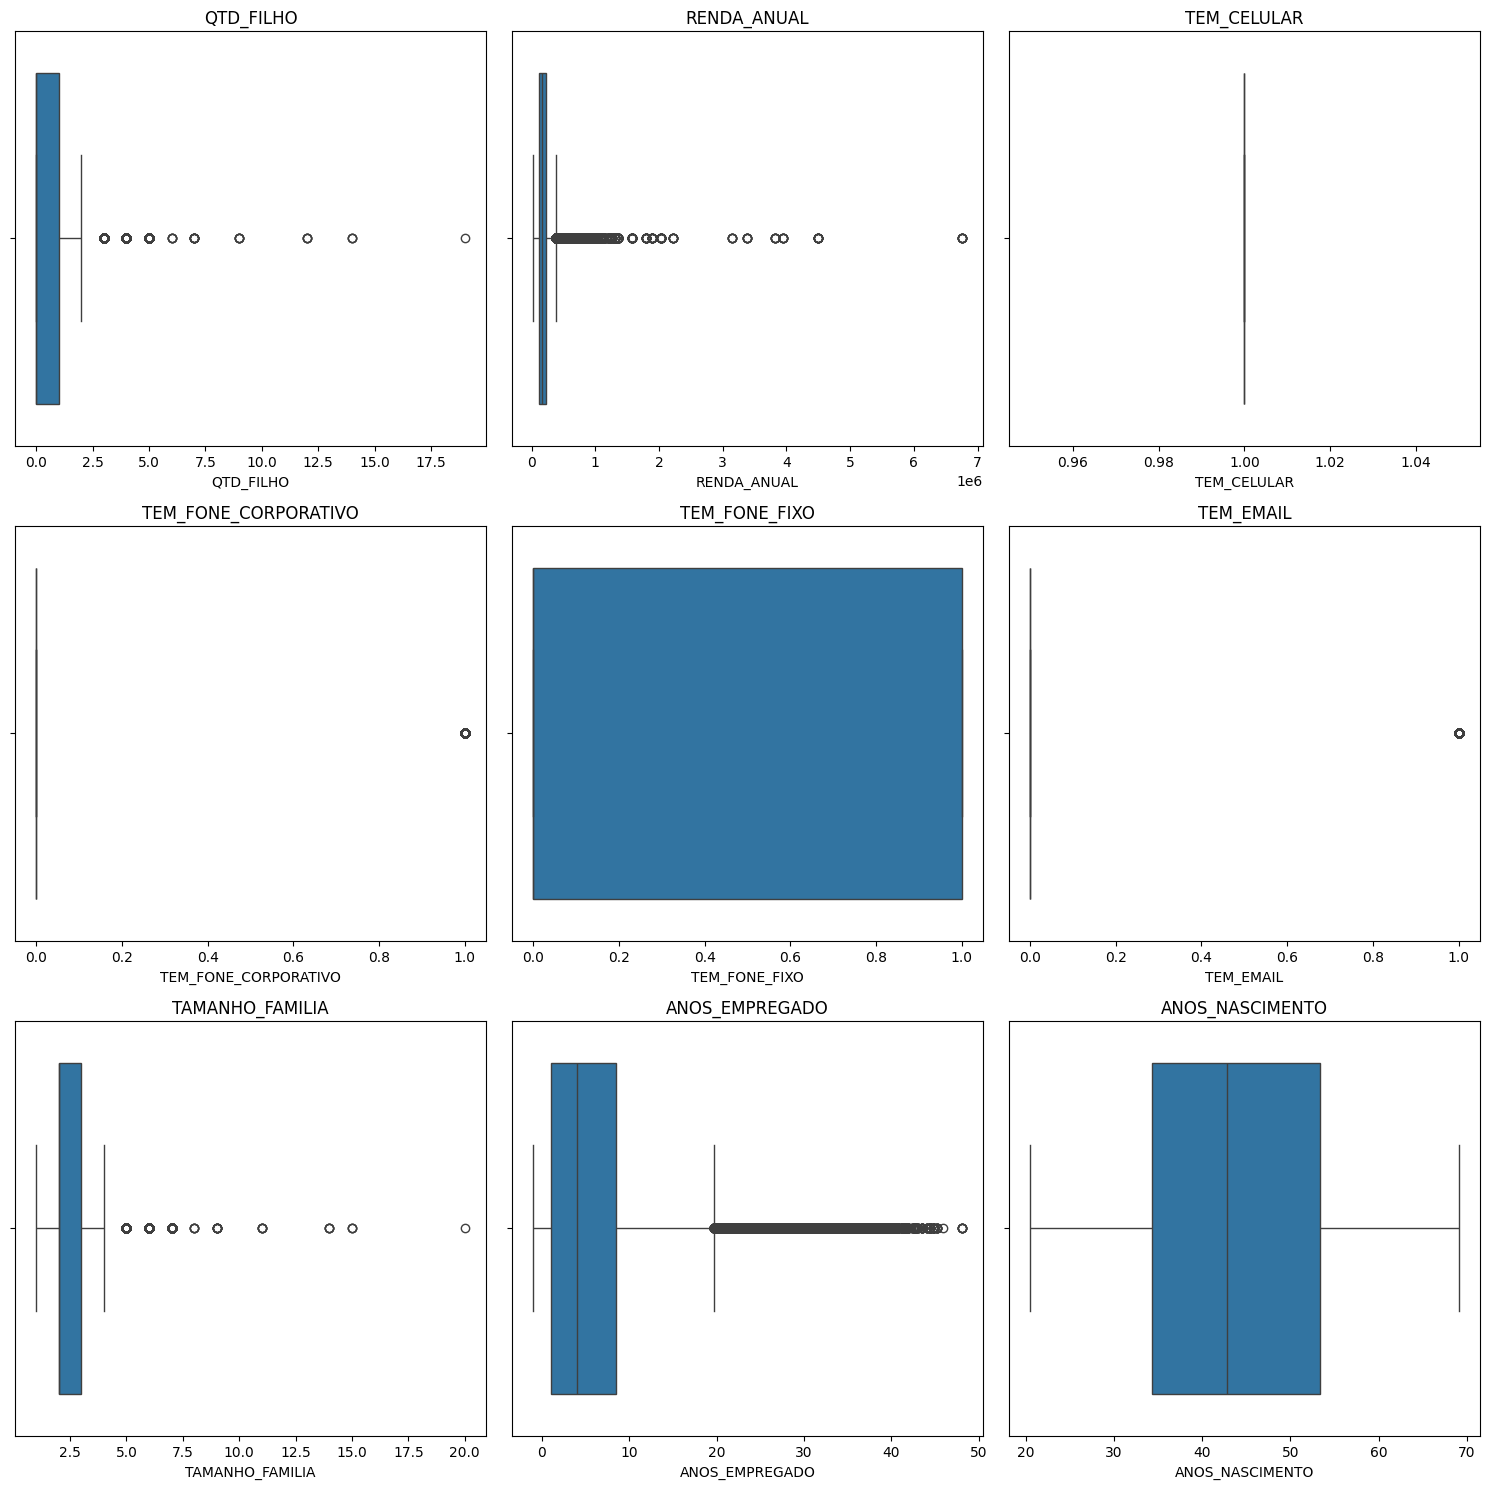

In [95]:
# Selecionar apenas as colunas numéricas, excluindo a coluna 'ID'
colunas_numericas = dados_cliente_ID_unicos.select_dtypes(include=['number']).drop('ID', axis=1).columns

# Criar uma figura com subplots
num_colunas = len(colunas_numericas)
num_linhas = (num_colunas + 2) // 3  # Calcular o número de linhas necessárias para os subplots
fig, axes = plt.subplots(nrows=num_linhas, ncols=3, figsize=(15, 5 * num_linhas))

# Iterar pelas colunas numéricas e criar boxplots em cada subplot
for i, coluna in enumerate(colunas_numericas):
    linha = i // 3
    coluna_subplot = i % 3
    sns.boxplot(x=dados_cliente_ID_unicos[coluna], ax=axes[linha, coluna_subplot])
    axes[linha, coluna_subplot].set_title(coluna)

# Ajustar o layout e exibir o gráfico
plt.tight_layout()
plt.show()


Dos gráficos fica claro que as colunas QTD_FILHO, RENDA_ANUAL, TAMANHO_FAMILIA e ANOS_EMPREGADO ainda possuem outliers.

Precisamos analisar se esta remoção será significativa em relação ao todo.

In [96]:

# Definir os limites para identificar outliers usando o método IQR (Interquartile Range)
def identificar_outliers_iqr(data, coluna):
  Q1 = data[coluna].quantile(0.25)
  Q3 = data[coluna].quantile(0.75)
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR
  outliers = data[(data[coluna] < limite_inferior) | (data[coluna] > limite_superior)]
  return outliers

# Lista de colunas para verificar outliers
colunas_outliers = ['QTD_FILHO', 'RENDA_ANUAL', 'TAMANHO_FAMILIA', 'ANOS_EMPREGADO']

# Inicializar um DataFrame para armazenar as linhas com outliers
linhas_com_outliers = pd.DataFrame()

# Iterar pelas colunas e identificar outliers
for coluna in colunas_outliers:
  outliers_df = identificar_outliers_iqr(dados_cliente_ID_unicos, coluna)
  linhas_com_outliers = pd.concat([linhas_com_outliers, outliers_df])

# Remover duplicatas para obter o número total de linhas com pelo menos um outlier
linhas_com_outliers = linhas_com_outliers.drop_duplicates()

# Quantidade de linhas com outliers
quantidade_linhas_com_outliers = linhas_com_outliers.shape[0]

print(f"A quantidade de linhas com outliers nas colunas {colunas_outliers} é: {quantidade_linhas_com_outliers}")


A quantidade de linhas com outliers nas colunas ['QTD_FILHO', 'RENDA_ANUAL', 'TAMANHO_FAMILIA', 'ANOS_EMPREGADO'] é: 45698


In [97]:
percentual = quantidade_linhas_com_outliers / dados_cliente_ID_unicos.shape[0] * 100
print(f'O percentual de linhas com outliers é de {percentual:.2f}%')

O percentual de linhas com outliers é de 10.42%


Esta quantidade de linhas com outliers já é bastante representativa em nossa base. Vamos salvar este filtro em um novo dataframe de modo que tenhamos duas metodologias de treino do modelo e possamos futuramente compara-las.

In [98]:
dados_cliente_sem_outliers = dados_cliente_ID_unicos.drop(linhas_com_outliers.index)
dados_cliente_sem_outliers.shape

(392765, 18)

In [99]:
dados_cliente_sem_outliers.describe()

,ID,QTD_FILHO,RENDA_ANUAL,TEM_CELULAR,TEM_FONE_CORPORATIVO,TEM_FONE_FIXO,TEM_EMAIL,TAMANHO_FAMILIA,ANOS_EMPREGADO,ANOS_NASCIMENTO
count,3.927650e+05,392765.000000,392765.000000,392765.0,392765.000000,392765.000000,392765.000000,392765.000000,392765.000000,392765.000000
mean,6.020099e+06,0.395700,172881.555638,1.0,0.203323,0.283396,0.104915,2.159396,4.648623,43.599583
std,5.718772e+05,0.654967,70522.707355,0.0,0.402471,0.450648,0.306444,0.838173,4.889929,11.703896
min,5.008806e+06,0.000000,26100.000000,1.0,0.000000,0.000000,0.000000,1.000000,-1.000000,20.517808
25%,5.602446e+06,0.000000,117000.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.797260,33.734247
50%,6.046413e+06,0.000000,157500.000000,1.0,0.000000,0.000000,0.000000,2.000000,3.580822,42.317808
75%,6.454094e+06,1.000000,225000.000000,1.0,0.000000,1.000000,0.000000,3.000000,7.610959,53.534247
max,7.999952e+06,2.000000,378900.000000,1.0,1.000000,1.000000,1.000000,4.000000,19.726027,69.043836


Depois de todo este tratamento, vemos ainda que há uma variável que não muda durante todo o dataset, a feature 'TEM_CELULAR'. Por conta de que todos os clientes possuem celular, esta feature se torna irrelevante para treino do modelo e, por conta disto, ela será removida do dataframe.

In [100]:
dados_cliente_sem_outliers = dados_cliente_sem_outliers.drop(['TEM_CELULAR'], axis=1)
dados_cliente_sem_outliers.shape

(392765, 17)

## 4.1.2 Análise das variáveis categóricas

Vamos voltar a analisar as informações de nosso dataframe tratado, sendo que desta vez analisaremos as features do tipo objeto.

In [101]:
dados_cliente_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392765 entries, 2 to 438556
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    392765 non-null  int64  
 1   GENERO                392765 non-null  object 
 2   TEM_CARRO             392765 non-null  object 
 3   TEM_IMOVEL            392765 non-null  object 
 4   QTD_FILHO             392765 non-null  int64  
 5   RENDA_ANUAL           392765 non-null  float64
 6   CATEGORIA_RENDA       392765 non-null  object 
 7   TIPO_EDUCACAO         392765 non-null  object 
 8   ESTADO_CIVIL          392765 non-null  object 
 9   TIPO_MORADIA          392765 non-null  object 
 10  TEM_FONE_CORPORATIVO  392765 non-null  int64  
 11  TEM_FONE_FIXO         392765 non-null  int64  
 12  TEM_EMAIL             392765 non-null  int64  
 13  PROFISSAO             267470 non-null  object 
 14  TAMANHO_FAMILIA       392765 non-null  float64
 15  ANOS_

Dentre as features, ainda identificamos que a coluna PROFISSÃO possui valores nulos. Para simplificar, vamos categorizar estes valores para "Outros".

In [102]:
dados_cliente_sem_outliers['PROFISSAO'].fillna('Outros', inplace=True)
dados_cliente_sem_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392765 entries, 2 to 438556
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    392765 non-null  int64  
 1   GENERO                392765 non-null  object 
 2   TEM_CARRO             392765 non-null  object 
 3   TEM_IMOVEL            392765 non-null  object 
 4   QTD_FILHO             392765 non-null  int64  
 5   RENDA_ANUAL           392765 non-null  float64
 6   CATEGORIA_RENDA       392765 non-null  object 
 7   TIPO_EDUCACAO         392765 non-null  object 
 8   ESTADO_CIVIL          392765 non-null  object 
 9   TIPO_MORADIA          392765 non-null  object 
 10  TEM_FONE_CORPORATIVO  392765 non-null  int64  
 11  TEM_FONE_FIXO         392765 non-null  int64  
 12  TEM_EMAIL             392765 non-null  int64  
 13  PROFISSAO             392765 non-null  object 
 14  TAMANHO_FAMILIA       392765 non-null  float64
 15  ANOS_

No total, temos 8 colunas do tipo objeto, desse modo, vamos verificar os valores únicos das features tipo objeto em busca de transforma-los para numéricos.


In [103]:
for coluna in dados_cliente_sem_outliers.select_dtypes(include=['object']).columns:
  print(f"Valores únicos da coluna '{coluna}': {dados_cliente_sem_outliers[coluna].unique()}")

Valores únicos da coluna 'GENERO': ['M' 'F']
Valores únicos da coluna 'TEM_CARRO': ['Y' 'N']
Valores únicos da coluna 'TEM_IMOVEL': ['Y' 'N']
Valores únicos da coluna 'CATEGORIA_RENDA': ['Working' 'Commercial associate' 'Pensioner' 'State servant' 'Student']
Valores únicos da coluna 'TIPO_EDUCACAO': ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
Valores únicos da coluna 'ESTADO_CIVIL': ['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
Valores únicos da coluna 'TIPO_MORADIA': ['House / apartment' 'Rented apartment' 'Municipal apartment'
 'With parents' 'Co-op apartment' 'Office apartment']
Valores únicos da coluna 'PROFISSAO': ['Security staff' 'Sales staff' 'Outros' 'Accountants' 'Laborers'
 'Drivers' 'Core staff' 'Managers' 'High skill tech staff'
 'Cleaning staff' 'Private service staff' 'Cooking staff'
 'Low-skill Laborers' 'Medicine staff' 'Secretaries'
 'Waiters/barmen staff' 'HR staff' 'Realty ag

De modo análogo ao que fizemos para as colunas iniciais dos dataframes, vamos traduzir os valores das variáveis categóricas para facilitar a exploração dos dados.

In [104]:
dicionario_val_categ = {
    'F': 'Feminino',
    'M': 'Masculino',
    'N': 'Não',
    'Y': 'Sim',
    'Working': 'Trabalhando',
    'Commercial associate': 'Associado_comercial',
    'Pensioner': 'Pensionista',
    'State servant': 'Servidor_público',
    'Student': 'Estudante',
    'Unemployed': 'Desempregado',
    'Secondary / secondary special': 'Ensino médio/médio especial',
    'Higher education': 'Ensino_superior',
    'Incomplete higher': 'Ensino_superior_incompleto',
    'Lower secondary': 'Ensino_fundamental',
    'Academic degree': 'Graduação_acadêmica',
    'Civil marriage': 'União_estável',
    'Married': 'Casado',
    'Separated': 'Separado',
    'Single / not married': 'Solteiro/não casado',
    'Widow': 'Viúvo',
    'House / apartment': 'Casa/apartamento',
    'With parents': 'Com_os_pais',
    'Municipal apartment': 'Apartamento_municipal',
    'Rented apartment': 'Apartamento_alugado',
    'Office apartment': 'Apartamento_de_escritório',
    'Security staff': 'Segurança',
    'Sales staff': 'Venda',
    'Accountants': 'Contabilidade',
    'Laborers': 'Construção_Civil',
    'Drivers': 'Motorista',
    'Core staff': 'Equipe_principal',
    'Managers': 'Gerencia',
    'High skill tech staff': 'Profissional_de_alta_tecnologia',
    'Cleaning staff': 'Limpeza',
    'Private service staff': 'Serviço_privado',
    'Cooking staff': 'Cozinha',
    'Low-skill Laborers': 'Trabalhador_de_baixa_qualificação',
    'Medicine staff': 'Medicina',
    'Secretaries': 'Secretariado',
    'Waiters/barmen staff': 'Garçom/barman',
    'HR staff': 'RH',
    'Realty agents': 'Corretor_imobiliário',
    'IT staff': 'TI',
    'Outros': 'Outros'
    }

In [105]:
for column in dados_cliente_sem_outliers.select_dtypes(include=['object']).columns:
  dados_cliente_sem_outliers[column] = dados_cliente_sem_outliers[column].map(dicionario_val_categ)

In [106]:
for coluna in dados_cliente_sem_outliers.select_dtypes(include=['object']).columns:
  print(f"Valores únicos da coluna '{coluna}': {dados_cliente_sem_outliers[coluna].unique()}")

Valores únicos da coluna 'GENERO': ['Masculino' 'Feminino']
Valores únicos da coluna 'TEM_CARRO': ['Sim' 'Não']
Valores únicos da coluna 'TEM_IMOVEL': ['Sim' 'Não']
Valores únicos da coluna 'CATEGORIA_RENDA': ['Trabalhando' 'Associado comercial' 'Pensionista' 'Servidor público'
 'Estudante']
Valores únicos da coluna 'TIPO_EDUCACAO': ['Ensino médio/médio especial' 'Ensino superior'
 'Ensino superior incompleto' 'Ensino fundamental' 'Graduação acadêmica']
Valores únicos da coluna 'ESTADO_CIVIL': ['Casado' 'Solteiro/não casado' 'Separado' 'União estável' 'Viúvo']
Valores únicos da coluna 'TIPO_MORADIA': ['Casa/apartamento' 'Apartamento alugado' 'Apartamento municipal'
 'Com os pais' nan 'Apartamento de escritório']
Valores únicos da coluna 'PROFISSAO': ['Segurança' 'Venda' 'Outros' 'Contabilidade' 'Construção Civil'
 'Motorista' 'Equipe principal' 'Gerencia'
 'Profissional de alta tecnologia' 'Limpeza' 'Serviço privado' 'Cozinha'
 'Trabalhador de baixa qualificação' 'Medicina' 'Secretaria

* **Caso de regulamento de crédito no Brasil**

No Brasil, os modelos de crédito são regulamentados e fiscalizados pelo Banco Central.

Existem diversas regras que precisam ser seguidas e existem informações que não podem ser consideradas. As informações sensíveis são:

1. Origem social e étnica;
1. Condições de saúde;
1. Informação genética;
1. Orientação Sexual;
1. Convicções políticas, religiosas e filosóficas;

Sendo assim, a variável 'GENERO' tambem deve ser desconsiderada para o cálculo do modelo, visto que fere uma das regras do BACEM.

In [107]:
dados_cliente_sem_outliers = dados_cliente_sem_outliers.drop(['GENERO'], axis=1)
dados_cliente_sem_outliers.shape

(392765, 16)

## 4.2 Tratamento do dataframe Dados_Credito

Inicialmente, vamos analisar informações gerais deste dataframe.

In [108]:
dados_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   BALANCO_MENSAL  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


Conclui-se que:
* Não há linhas com valores nulos;
* Coluna 'ID' que corresponderá a coluna de mesmo nome do dataset dados_cliente;
* 'STATUS' do tipo objeto que informa os pagamentos e atrasos do cliente por mês.

Vamos analisar a feature STATUS a qual identifica o nivel de relacionamento que os clientes tem como o banco com pagamentos em dia ou não.

In [109]:
dados_credito.STATUS.value_counts().index.to_list()

['C', '0', 'X', '1', '5', '2', '3', '4']

Conforme visto na seção anterior, os valores únicos desta feature possuem um significado específico. Vamos criar um novo dicionário para traduzir o que cada dígito quer dizer.

In [110]:
dicionario_STATUS = {
    'C': 'pagamento realizado',
    '0': '1-29 dias em atraso',
    '1': '30-59 dias em atraso',
    '2': '60-89 dias em atraso',
    '3': '90-119 dias em atraso',
    '4': '120-149 dias em atraso',
    '5': 'acima de 150 dias em atraso',
    'X': 'nenhum empréstimo no mês'
    }

In [111]:
dados_credito.STATUS = dados_credito.STATUS.map(dicionario_STATUS)
dados_credito.STATUS.value_counts().index.to_list()

['pagamento realizado',
 '1-29 dias em atraso',
 'nenhum empréstimo no mês',
 '30-59 dias em atraso',
 'acima de 150 dias em atraso',
 '60-89 dias em atraso',
 '90-119 dias em atraso',
 '120-149 dias em atraso']

Para melhor entendimento, vamos trazer dois exemplos de clientes para analisar como a feature STATUS se comporta:

In [112]:
dados_credito.query('ID == 5001712')

,ID,BALANCO_MENSAL,STATUS
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias em atraso


Como pode ser visto, o cliente '5001712' abriu uma conta a 19 meses e nos primeiros 10 meses de existencia realizou os pagamentos das mensalidades com atraso.

Depois disto, este mesmo cliente aparentemente conseguiu recuperar sua "fase ruim" e tem executado pagamentos em dia desde então.

Agora vamos ver o histórico do cliente '5001711':

In [113]:
dados_credito.query('ID == 5001711')

,ID,BALANCO_MENSAL,STATUS
0,5001711,0,nenhum empréstimo no mês
1,5001711,-1,1-29 dias em atraso
2,5001711,-2,1-29 dias em atraso
3,5001711,-3,1-29 dias em atraso


Como pode ser visto, este é um cliente relativamente novo em solicitações de crédito, tendo pagamentos atrasados nos últimos 3 meses e não realizou empréstimo no mês atual.

Seu histórico é bem inferior ao cliente anterior. Então, um dos principais desafios deste projeto começa a se mostrar.

***Como poder classificar o cliente bom ou mau pagador?***

---

Podemos separar este problema em 2 partes:

1. Tentar entender qual melhor status de atraso melhor define um mau pagador.

1. Cliente com pouco histórico de pagamento/atrasos não consegue representar bem se no futuro ele será um bom ou mau pagador. Vamos analisar mais a frente o tamanho deste histórico.

Primeiramente, vamos analisar quando que as contas dos clientes foram abertas criando uma feature MES_ABERTURA. Assim podemos analisar se temos muitos ou poucos clientes antigos.

In [114]:
abertura_conta_agrupados_ID = dados_credito.groupby('ID')['BALANCO_MENSAL'].min().reset_index()
abertura_conta_agrupados_ID.rename(columns={'BALANCO_MENSAL': 'MES_ABERTURA'}, inplace=True)
abertura_conta_agrupados_ID.head()

,ID,MES_ABERTURA
0,5001711,-3
1,5001712,-18
2,5001713,-21
3,5001714,-14
4,5001715,-59


 Além disso, vamos criar tambem uma coluna MES_FECHAMENTO para armazenar em uma coluna o mês em que a conta do cliente foi fechada. A maioria estarão abertas até o mes atual (zero), porém haverão alguns clientes que encerraram o relacionamento com o banco no passado.

In [115]:
fechamento_conta_agrupados_ID = dados_credito.groupby('ID')['BALANCO_MENSAL'].max().reset_index()
fechamento_conta_agrupados_ID.rename(columns={'BALANCO_MENSAL': 'MES_FECHAMENTO'}, inplace=True)
fechamento_conta_agrupados_ID['MES_FECHAMENTO'].value_counts()

,count
MES_FECHAMENTO,
0,33856
-1,950
-2,459
-4,430
-12,417
...,...
-56,17
-57,10
-58,6


Agora vamos incluir estas duas colunas no nosso dataset.

In [116]:
dados_credito = dados_credito.merge(abertura_conta_agrupados_ID, on='ID', how='left')
dados_credito = dados_credito.merge(fechamento_conta_agrupados_ID, on='ID', how='left')
dados_credito.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO
0,5001711,0,nenhum empréstimo no mês,-3,0
1,5001711,-1,1-29 dias em atraso,-3,0
2,5001711,-2,1-29 dias em atraso,-3,0
3,5001711,-3,1-29 dias em atraso,-3,0
4,5001712,0,pagamento realizado,-18,0


Por fim, vamos adicionar mais uma coluna para calcular a janela de tempo que o cliente permanece atuante no banco.

In [117]:
dados_credito['JANELA_TEMPO'] = dados_credito['MES_FECHAMENTO'] - dados_credito['MES_ABERTURA']
dados_credito.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO,JANELA_TEMPO
0,5001711,0,nenhum empréstimo no mês,-3,0,3
1,5001711,-1,1-29 dias em atraso,-3,0,3
2,5001711,-2,1-29 dias em atraso,-3,0,3
3,5001711,-3,1-29 dias em atraso,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


Agora vamos criar mais uma feature chamada MOB (Month Of Book). No mercado financeiro, **MOB (Month on Book)**, ou **Month of Book**, refere-se ao número de meses decorridos desde que um ativo financeiro, como um empréstimo ou contrato, foi registrado no balanço de uma instituição. Essa métrica é usada para acompanhar o tempo de vida de um ativo, sendo especialmente relevante em análises de crédito e carteiras de empréstimos, onde o desempenho ou comportamento de um ativo pode variar ao longo de seu ciclo. A MOB ajuda a medir a maturidade e o risco associado a um ativo à medida que ele envelhece.

O cálculo da MOB é simplesmente o BALANCO_MENSAL - MES_ABERTURA:

In [118]:
dados_credito['MOB'] = dados_credito['BALANCO_MENSAL'] - dados_credito['MES_ABERTURA']
dados_credito.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO,JANELA_TEMPO,MOB
0,5001711,0,nenhum empréstimo no mês,-3,0,3,3
1,5001711,-1,1-29 dias em atraso,-3,0,3,2
2,5001711,-2,1-29 dias em atraso,-3,0,3,1
3,5001711,-3,1-29 dias em atraso,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


Agora que temos as variáveis necessárias para estipular uma regra para bons e maus pagadores, vamos transformar a feature STATUS em variável numérica para facilitar a manipulação.

Para isto vamos criar um dicionário para fazer uma nova transformação:

In [119]:
dicionario_STATUS = {
    'nenhum empréstimo no mês': 0,
    'pagamento realizado': 1,
    '1-29 dias em atraso': 2,
    '30-59 dias em atraso': 3,
    '60-89 dias em atraso': 4,
    '90-119 dias em atraso': 5,
    '120-149 dias em atraso': 6,
    'acima de 150 dias em atraso': 7}

In [120]:
dados_credito['IND_STATUS'] = dados_credito.STATUS.map(dicionario_STATUS)
dados_credito.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO,JANELA_TEMPO,MOB,IND_STATUS
0,5001711,0,nenhum empréstimo no mês,-3,0,3,3,0
1,5001711,-1,1-29 dias em atraso,-3,0,3,2,2
2,5001711,-2,1-29 dias em atraso,-3,0,3,1,2
3,5001711,-3,1-29 dias em atraso,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


Com o este Dataframe, vamos fazer cinco novas features considerando cada um do status de atraso como mau pagador. Assim, poderemos verificar graficamente o comportamento de cada status ao longo o tempo.

In [121]:
dict_intervalo_atraso = {
    'maior_30_dias': 3,
    'maior_60_dias': 4,
    'maior_90_dias': 5,
    'maior_120_dias': 6,
    'maior_150_dias': 7
}

In [122]:
for chave, valor in dict_intervalo_atraso.items():
  dados_credito[f'Mau_{chave}'] = dados_credito.apply(lambda x: 1 if x['IND_STATUS'] >= valor else 0, axis=1)
dados_credito.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO,JANELA_TEMPO,MOB,IND_STATUS,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo no mês,-3,0,3,3,0,0,0,0,0,0
1,5001711,-1,1-29 dias em atraso,-3,0,3,2,2,0,0,0,0,0
2,5001711,-2,1-29 dias em atraso,-3,0,3,1,2,0,0,0,0,0
3,5001711,-3,1-29 dias em atraso,-3,0,3,0,2,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0


Para cada feature de mau pagador, vamos calcular uma taxa ao longo dos 60 meses.

Esta taxa, aqui nomeada como **taxa_mau_pagador**, é calculada passando por cada momento de abertura de conta e por cada período do MOB. Depois verificamos quantos clientes foram classificados como mau pagador. Depois disto dividimos a quantidade de maus pela quantidade total de clientes neste período para encontrar a taxa.

In [123]:
dict_taxa_mau = {}
id_sum = len(set(dados_credito['ID']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = dados_credito.query(f'Mau_{chave} == 1').groupby('ID')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID'].to_list()
      lst.extend(due)
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


Munido com estas taxas vamos verificar o comportamento ao longo do tempo.

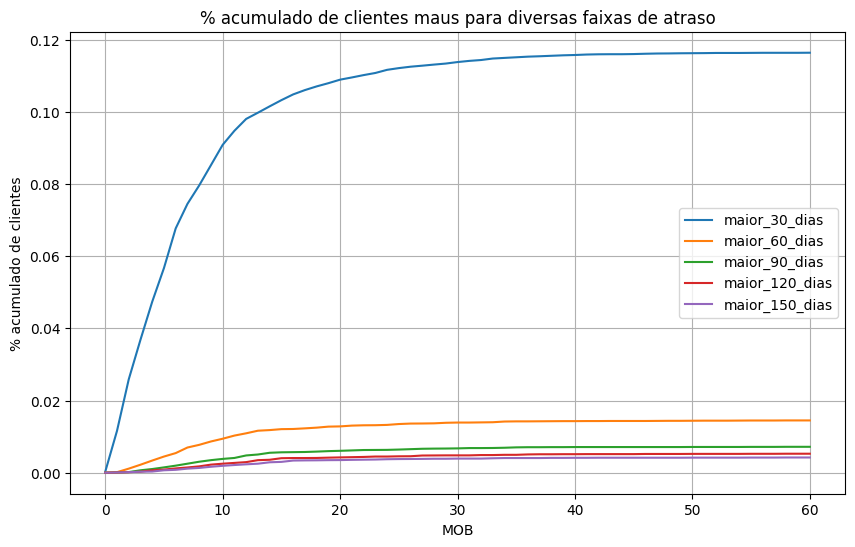

In [124]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus para diversas faixas de atraso', figsize=(10, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

Neste gráfico é possível verificar que independente de quando o crédito do cliente tenha sido aberto, ele vai estabilizar depois de um período. Além disso, a subida nos primeiros 12 meses é vertiginosa e depois se estabiliza.

A curva 'maior_30_dias' é a mais acentuada e por conta disto seria a primeira escolha para indicação de apontar como mau pagadores.

No entanto, a quantidade de clientes que ao menos uma vez teve um atraso maior que 30 dias, é de 100% de toda a base.

Sendo assim, a regra de classificação de maus pagadores será para clientes que:

1. **Possuam histórico de empréstimo acima de 12 meses;**

2. **Tenham status de atraso maior que 60 dias;**

## 4.2.1 Reduzindo base de clientes para acima de 12 meses

Fazendo filtro dos clientes com janela acima temos uma perda mostrada abaixo:

In [125]:
qtd_clientes_toda_janela = len(dados_credito.groupby('ID').count().index)
qtd_clientes_toda_janela_acima_12 = len(dados_credito.query('JANELA_TEMPO >= 12').groupby('ID').count().index)
percent = qtd_clientes_toda_janela_acima_12 / qtd_clientes_toda_janela
print(f'Quantidade de clientes em toda janela de tempo: {qtd_clientes_toda_janela}')
print(f'Quantidade de clientes acima de 12 meses: {qtd_clientes_toda_janela_acima_12}')
print(f'Montante percentual: {percent*100:.2f}%')

Quantidade de clientes em toda janela de tempo: 45985
Quantidade de clientes acima de 12 meses: 30918
Montante percentual: 67.23%


É um número bem representativo, porém vamos seguir com este conceito para futuramente ajusta-lo.

In [126]:
dados_credito_acima_12 = dados_credito.query('JANELA_TEMPO >= 12')
dados_credito_acima_12.shape

(943061, 13)

## 4.2.2 Concluindo variável target

Para finalizar nossa coluna target vamos marcar os maus pagadores com atrasos acima de 60 dias.

In [127]:
dados_credito_acima_12.head()

,ID,BALANCO_MENSAL,STATUS,MES_ABERTURA,MES_FECHAMENTO,JANELA_TEMPO,MOB,IND_STATUS,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0
5,5001712,-1,pagamento realizado,-18,0,18,17,1,0,0,0,0,0
6,5001712,-2,pagamento realizado,-18,0,18,16,1,0,0,0,0,0
7,5001712,-3,pagamento realizado,-18,0,18,15,1,0,0,0,0,0
8,5001712,-4,pagamento realizado,-18,0,18,14,1,0,0,0,0,0


In [128]:
dados_credito_acima_12.STATUS.unique()

array(['pagamento realizado', '1-29 dias em atraso',
       'nenhum empréstimo no mês', '30-59 dias em atraso',
       '60-89 dias em atraso', '90-119 dias em atraso',
       '120-149 dias em atraso', 'acima de 150 dias em atraso'],
      dtype=object)

In [129]:
def verifica(registros):
  lista_status = registros['STATUS'].to_list()
  if '60-89 dias em atraso' in lista_status or '90-119 dias em atraso' in lista_status or '120-149 dias em atraso' in lista_status or 'acima de 150 dias em atraso' in lista_status:
    return 1
  else:
    return 0

dados_credito_target = pd.DataFrame(dados_credito_acima_12.groupby('ID').apply(verifica)).reset_index()
dados_credito_target.columns = ['ID', 'Mau']
dados_credito_target.head()

,ID,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


Agora vamos unir a variável target com os dados dos clientes

In [130]:
dados_credito_target.shape

(30918, 2)

In [131]:
dados_credito_acima_12.shape

(943061, 13)

In [132]:
dados_clientes_target = dados_cliente_sem_outliers.merge(dados_credito_target, on='ID')
dados_clientes_target.head()

,ID,TEM_CARRO,TEM_IMOVEL,QTD_FILHO,RENDA_ANUAL,CATEGORIA_RENDA,TIPO_EDUCACAO,ESTADO_CIVIL,TIPO_MORADIA,TEM_FONE_CORPORATIVO,TEM_FONE_FIXO,TEM_EMAIL,PROFISSAO,TAMANHO_FAMILIA,ANOS_EMPREGADO,ANOS_NASCIMENTO,Mau
0,5008806,Sim,Sim,0,112500.0,Trabalhando,Ensino médio/médio especial,Casado,Casa/apartamento,0,0,0,Segurança,2.0,3.106849,58.832877,0
1,5008810,Não,Sim,0,270000.0,Associado comercial,Ensino médio/médio especial,Solteiro/não casado,Casa/apartamento,0,1,1,Venda,1.0,8.358904,52.356164,0
2,5008811,Não,Sim,0,270000.0,Associado comercial,Ensino médio/médio especial,Solteiro/não casado,Casa/apartamento,0,1,1,Venda,1.0,8.358904,52.356164,0
3,5008812,Não,Sim,0,283500.0,Pensionista,Ensino superior,Separado,Casa/apartamento,0,0,0,Outros,1.0,-1.000000,61.545205,0
4,5008813,Não,Sim,0,283500.0,Pensionista,Ensino superior,Separado,Casa/apartamento,0,0,0,Outros,1.0,-1.000000,61.545205,0


Agora com a variável target fechada, vamos analizar a proporção.

In [133]:
dados_clientes_target['Mau'].value_counts(normalize=True)*100

,proportion
Mau,
0,97.694373
1,2.305627


Já vemos que os dados estão bem desbalanceados. Veremos nas próximas seções como lidar com este problema.

# 5. Análise e Exploração dos dados

Após o tratamento dos dados feitos na seção anterior, vamos explorar graficamente algumas informações deste dataset.

Lembrando que os dados aqui analisados estão sem a presença de outliers com o intuito de buscar pelas informações que tratam da maioria do publico analisado.



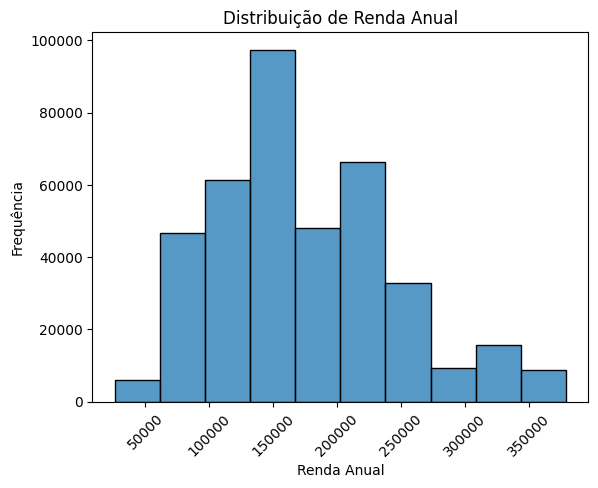

In [134]:
sns.histplot(data=dados_cliente_sem_outliers, x='RENDA_ANUAL', bins=10)
plt.title('Distribuição de Renda Anual')
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

A distribuição é levemente assimétrica à direita (right-skewed), com a maior concentração de clientes apresentando uma renda anual entre **100.000 e 200.000**. O pico ocorre por volta de **150.000** de renda anual, sugerindo que este seja o valor mais comum entre os clientes.

A faixa de renda vai de cerca de **50.000** até **350.000**, com uma pequena quantidade de clientes abaixo dos **50.000** e acima dos **300.000**. Os extremos apresentam menos frequência, o que pode sugerir uma menor representatividade desses grupos.

Pelo formato da distribuição, é possível que a **mediana** esteja mais próxima da faixa de **150.000**, enquanto a **média** pode estar ligeiramente maior, devido à cauda à direita.

Apesar de uma menor frequência, há uma parcela de clientes com rendas anuais superiores a **250.000**, o que pode representar um grupo de alta renda com comportamento e necessidades financeiras distintas.

Essa análise pode ser útil para segmentar os clientes em diferentes faixas de renda e personalizar estratégias de marketing, produtos ou serviços para cada grupo, levando em conta os padrões de distribuição observados.

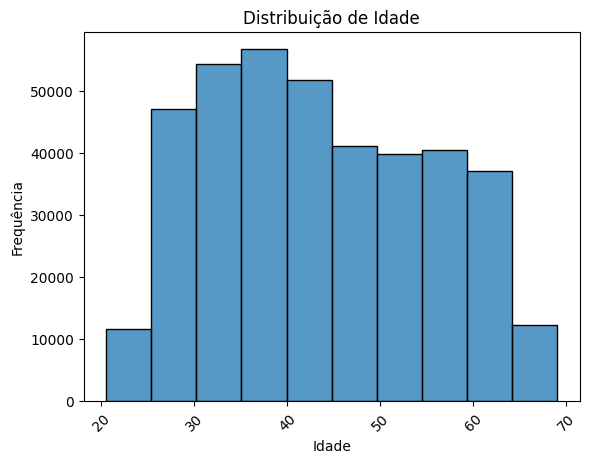

In [135]:
sns.histplot(data=dados_cliente_sem_outliers, x='ANOS_NASCIMENTO', bins=10)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

A distribuição de idade dos clientes segue um formato aproximadamente **simétrico**, com a maioria dos clientes concentrados entre **30 e 50 anos**. A distribuição é relativamente uniforme nessa faixa, com um pico levemente maior por volta dos **40 anos**.

A idade dos clientes varia de **20 a 70 anos**. Existem poucos clientes abaixo dos **30 anos** e acima dos **60 anos**, o que sugere que os grupos mais jovens e os mais velhos são menos representativos na base de clientes.

O pico da distribuição ocorre entre **35 e 45 anos**, sugerindo que essa é a faixa etária predominante. Esse grupo pode ser considerado o público-alvo principal do banco, provavelmente composto por indivíduos em fase de maior atividade profissional e financeira.

A presença de clientes entre **50 e 60 anos** também é significativa, o que indica uma base de clientes mais maduros que podem estar se aproximando da aposentadoria ou em fases avançadas de suas carreiras.

A menor frequência de clientes com menos de **30 anos** pode apontar para uma possível oportunidade de crescimento nesse segmento, talvez com produtos e serviços mais voltados para jovens em início de carreira.

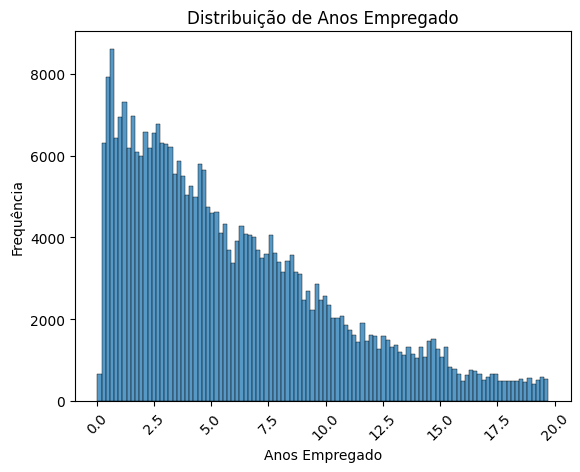

In [136]:
sns.histplot(data=dados_cliente_sem_outliers.query("ANOS_EMPREGADO > 0"), x='ANOS_EMPREGADO')
plt.title('Distribuição de Anos Empregado')
plt.xlabel('Anos Empregado')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

A distribuição é **fortemente assimétrica à direita**, com a maior concentração de clientes tendo menos de **5 anos** de emprego, e a frequência diminuindo gradualmente à medida que o tempo de emprego aumenta.

O pico mais alto ocorre logo no início, com muitos clientes tendo entre **0 a 1 ano** de emprego. Isso sugere que uma parte considerável da base de clientes está em início de carreira ou mudaram recentemente de emprego.

Após o pico inicial, há uma queda constante na frequência à medida que os anos de emprego aumentam. Existem poucos clientes com mais de **10 anos** de permanência no mesmo emprego, e quase nenhum com mais de **20 anos** de emprego.

Esse padrão pode refletir a volatilidade do mercado de trabalho ou um perfil de clientes que tendem a trocar de emprego com frequência. Alternativamente, pode indicar que o banco atrai muitos clientes mais jovens, que ainda não alcançaram longos períodos de tempo em seus empregos.

Como o número de clientes com mais de **10 anos** de emprego é relativamente baixo, o banco pode explorar estratégias específicas para este grupo, como ofertas personalizadas ou incentivos para fidelização.

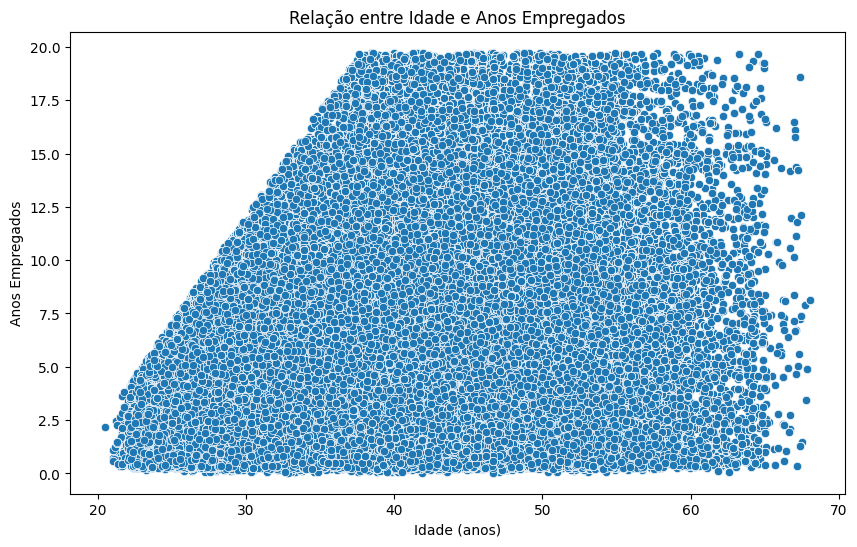

In [137]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ANOS_NASCIMENTO', y='ANOS_EMPREGADO', data=dados_cliente_sem_outliers.query("ANOS_EMPREGADO > 0"))
plt.title('Relação entre Idade e Anos Empregados')
plt.xlabel('Idade (anos)')
plt.ylabel('Anos Empregados')
plt.show()


O gráfico apresenta uma relação triangular, com um limite superior claramente definido em que a quantidade de **Anos Empregados** aumenta linearmente com a **Idade**. Isso faz sentido, pois, à medida que a pessoa envelhece, é mais provável que tenha mais anos de experiência no emprego.

Para idades a partir de **40 anos**, existe uma distribuição mais homogênea de anos de emprego, com clientes que podem ter desde poucos anos até mais de **15 anos** de experiência. Isso indica que, após essa idade, há maior variação nos tempos de permanência no emprego.

Entre os clientes mais jovens (20 a 30 anos), a maioria tem poucos anos de emprego (geralmente menos de **5 anos**). Isso reflete o tempo esperado de experiência para essa faixa etária.

Há alguns pontos no gráfico que representam clientes mais velhos (50 a 70 anos) com poucos anos de emprego, o que pode indicar transições de carreira tardias ou retorno ao mercado de trabalho.

Embora não esteja explicitamente indicado, parece haver uma correlação moderada entre idade e anos empregados, especialmente para indivíduos abaixo dos **40 anos**, onde o aumento de idade tende a corresponder a mais anos de emprego.

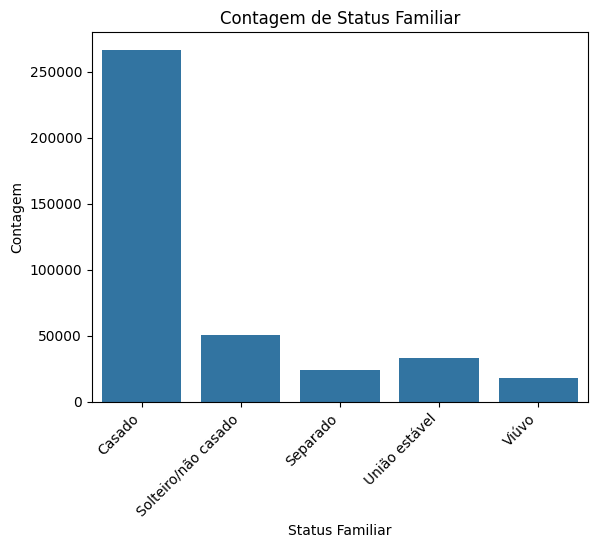

In [138]:
sns.countplot(x='ESTADO_CIVIL', data=dados_cliente_sem_outliers)
plt.title('Contagem de Status Familiar')
plt.xlabel('Status Familiar')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()


A maioria esmagadora dos clientes é **casada**, com uma contagem que supera **250.000**. Esse é o grupo mais representado entre os clientes, o que pode indicar que o banco tem um público fortemente composto por indivíduos em relacionamentos estáveis e com responsabilidades familiares.

O segundo maior grupo é o de clientes **solteiros/não casados**, embora em uma quantidade bem menor, com algo em torno de **50.000 a 60.000** clientes. Esse grupo representa uma fatia importante, mas ainda assim bem inferior ao grupo de casados.

Os clientes com status de **separado**, **união estável** e **viúvo** têm representações significativamente menores. Cada um desses grupos parece ter entre **20.000 a 40.000** clientes, sugerindo que são menos prevalentes dentro da base de clientes.

Essa distribuição pode ser útil para segmentar os produtos e serviços oferecidos pelo banco. Por exemplo, clientes **casados** podem ter maior interesse em produtos como financiamentos, seguros de vida e previdência privada. Já os **solteiros** podem estar mais focados em investimentos pessoais ou serviços voltados ao desenvolvimento financeiro individual.

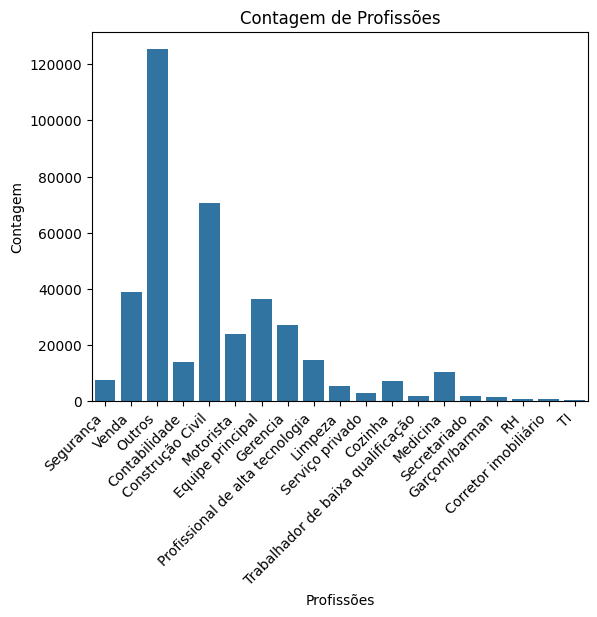

In [139]:
sns.countplot(x='PROFISSAO', data=dados_cliente_sem_outliers)
plt.title('Contagem de Profissões')
plt.xlabel('Profissões')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.show()

1. **Profissões com Maior Representatividade**:
   - A categoria **"Outros"** apresenta o maior número de clientes, com mais de **120.000**, sugerindo que uma grande parte dos clientes não se enquadra nas profissões especificadas. Isso pode indicar uma base de clientes bastante diversa em termos de ocupação.
   - **Contabilidade** aparece como a segunda profissão mais comum, com cerca de **80.000** clientes. Essa categoria tem uma representatividade significativa, indicando que muitos clientes trabalham com números e finanças, o que pode influenciar suas necessidades financeiras, como produtos de investimento ou planejamento de aposentadoria.
   - **Profissional de alta tecnologia** e **Equipe principal** também aparecem em grande número, com cerca de **40.000** a **60.000** clientes em cada categoria, sugerindo que há uma boa base de clientes em setores tecnológicos e de liderança.

2. **Profissões com Representatividade Média**:
   - **Segurança**, **Venda**, **Motorista**, e **Gerência** são ocupações que aparecem em níveis médios, com entre **20.000** e **40.000** clientes em cada uma. Essas categorias representam uma porção relevante da base de clientes e podem indicar grupos com necessidades específicas, como produtos relacionados a estabilidade financeira e seguros.
   - **Construção Civil** tem um número razoável de clientes, cerca de **20.000**, refletindo um setor que pode ter interesses em financiamento habitacional e outros tipos de empréstimos.

3. **Profissões com Menor Representatividade**:
   - Algumas profissões, como **Corretor imobiliário**, **RH**, **TI**, e **Garçom/barman**, apresentam contagens muito baixas, com menos de **5.000** clientes cada. Isso indica que o banco tem uma base pequena de clientes nesses setores.
   - **Trabalhador de baixa qualificação**, **Limpeza**, e **Serviço privado** também aparecem em menor número, embora ainda mais expressivos do que os setores mencionados acima.

Profissionais em **contabilidade** e **alta tecnologia** representam uma porção significativa da base de clientes, o que pode sugerir que o banco atraia indivíduos com habilidades específicas e que talvez tenham maior estabilidade financeira e necessidade de serviços bancários sofisticados.

A ampla diversidade de clientes na categoria **Outros** pode representar uma oportunidade para o banco de segmentar melhor essa base com ofertas mais direcionadas e personalizadas. Analisar de perto a renda anual desta população pode indicar em que faixa financeira estes clientes se encontram.

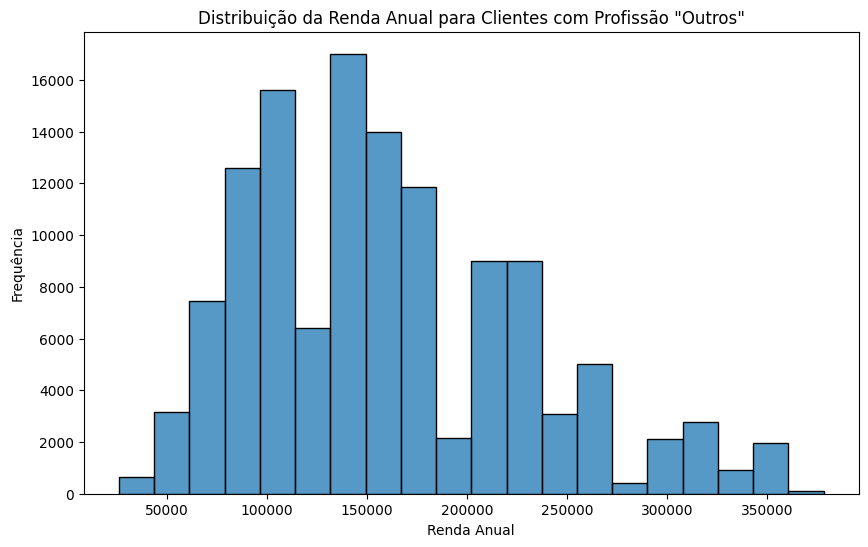

In [140]:
# Filtrar o DataFrame para incluir apenas as linhas onde a profissão é 'Outros'
df_outros = dados_cliente_sem_outliers.query("PROFISSAO == 'Outros'")

# Criar um histograma da renda anual para os clientes com profissão 'Outros'
plt.figure(figsize=(10, 6))
sns.histplot(data=df_outros, x='RENDA_ANUAL', bins=20)
plt.title('Distribuição da Renda Anual para Clientes com Profissão "Outros"')
plt.xlabel('Renda Anual')
plt.ylabel('Frequência')
plt.show()


A distribuição é **centrada** em torno de **150.000**, com um pico claro nessa faixa de renda anual. Isso indica que, dentro da categoria "Outros", a maioria dos clientes ganha entre **100.000** e **200.000** por ano, com o maior número em torno de **150.000**.

O gráfico apresenta uma leve **assimetria à direita**, indicando que há alguns clientes que possuem rendas significativamente mais altas, embora em menor quantidade. A cauda à direita se estende até rendas anuais de **350.000**.

Um número relativamente pequeno de clientes tem renda anual abaixo de **50.000**. Apesar de a maioria dos clientes estar concentrada em torno da mediana (entre **100.000** e **200.000**), há uma quantidade razoável de clientes com rendas maiores, especialmente entre **200.000** e **300.000**, com uma leve presença até **350.000**.

A categoria "Outros", apesar de ser uma categoria ampla, parece conter uma faixa de renda anual razoavelmente alta, o que pode indicar uma diversidade de ocupações dentro desse grupo que inclui cargos ou profissões que não foram capturados nas categorias pré-definidas, mas que ainda apresentam um perfil econômico elevado.

A concentração em torno de **150.000** sugere que este é um grupo financeiro estável, mas o banco pode explorar oportunidades para atender melhor aqueles que se situam nas faixas superiores de renda (acima de **250.000**), oferecendo produtos premium ou serviços personalizados.

# 6. Preparação dos Dados para os Modelos de Aprendizado de Máquina

## 6.1. Reconfigurando o dataset

Antes de realizar os treinamentos, vamos ordenar de maneira coerente as colunas, separando em contínuas, categoricas e categoricas binárias.

In [141]:
colunas_categoricas_binarias = ['TEM_CARRO', 'TEM_IMOVEL', 'TEM_FONE_CORPORATIVO', 'TEM_FONE_FIXO', 'TEM_EMAIL']
colunas_categoricas_nao_binarias = ['CATEGORIA_RENDA', 'TIPO_EDUCACAO', 'ESTADO_CIVIL', 'TIPO_MORADIA', 'PROFISSAO']
colunas_categoricas = colunas_categoricas_binarias + colunas_categoricas_nao_binarias
colunas_continuas = ['ANOS_NASCIMENTO', 'QTD_FILHO', 'RENDA_ANUAL', 'ANOS_EMPREGADO', 'TAMANHO_FAMILIA']

In [142]:
dados_clientes_target = dados_clientes_target[['ID'] + colunas_continuas + colunas_categoricas_binarias + colunas_categoricas_nao_binarias + ['Mau']]

In [143]:
dados_clientes_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20862 entries, 0 to 20861
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    20862 non-null  int64  
 1   ANOS_NASCIMENTO       20862 non-null  float64
 2   QTD_FILHO             20862 non-null  int64  
 3   RENDA_ANUAL           20862 non-null  float64
 4   ANOS_EMPREGADO        20862 non-null  float64
 5   TAMANHO_FAMILIA       20862 non-null  float64
 6   TEM_CARRO             20862 non-null  object 
 7   TEM_IMOVEL            20862 non-null  object 
 8   TEM_FONE_CORPORATIVO  20862 non-null  int64  
 9   TEM_FONE_FIXO         20862 non-null  int64  
 10  TEM_EMAIL             20862 non-null  int64  
 11  CATEGORIA_RENDA       20862 non-null  object 
 12  TIPO_EDUCACAO         20862 non-null  object 
 13  ESTADO_CIVIL          20862 non-null  object 
 14  TIPO_MORADIA          20768 non-null  object 
 15  PROFISSAO          

## 6.2. Analisando correlação entre features

In [144]:
# prompt: aplique a função onehotencoder em dados_clientes_target, salve-os em um novo dataframe

# Crie um OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', drop='first')

# Aplique o OneHotEncoder às colunas categóricas
encoded_features = enc.fit_transform(dados_clientes_target[colunas_categoricas]).toarray()

# Crie um novo DataFrame com as features codificadas
encoded_df = pd.DataFrame(encoded_features)

# Renomeie as colunas para facilitar a identificação
feature_names = enc.get_feature_names_out(colunas_categoricas)
encoded_df.columns = feature_names

# Concatene o DataFrame codificado com o DataFrame original
dados_clientes_target_encoded = pd.concat([dados_clientes_target.drop(columns=colunas_categoricas), encoded_df], axis=1)


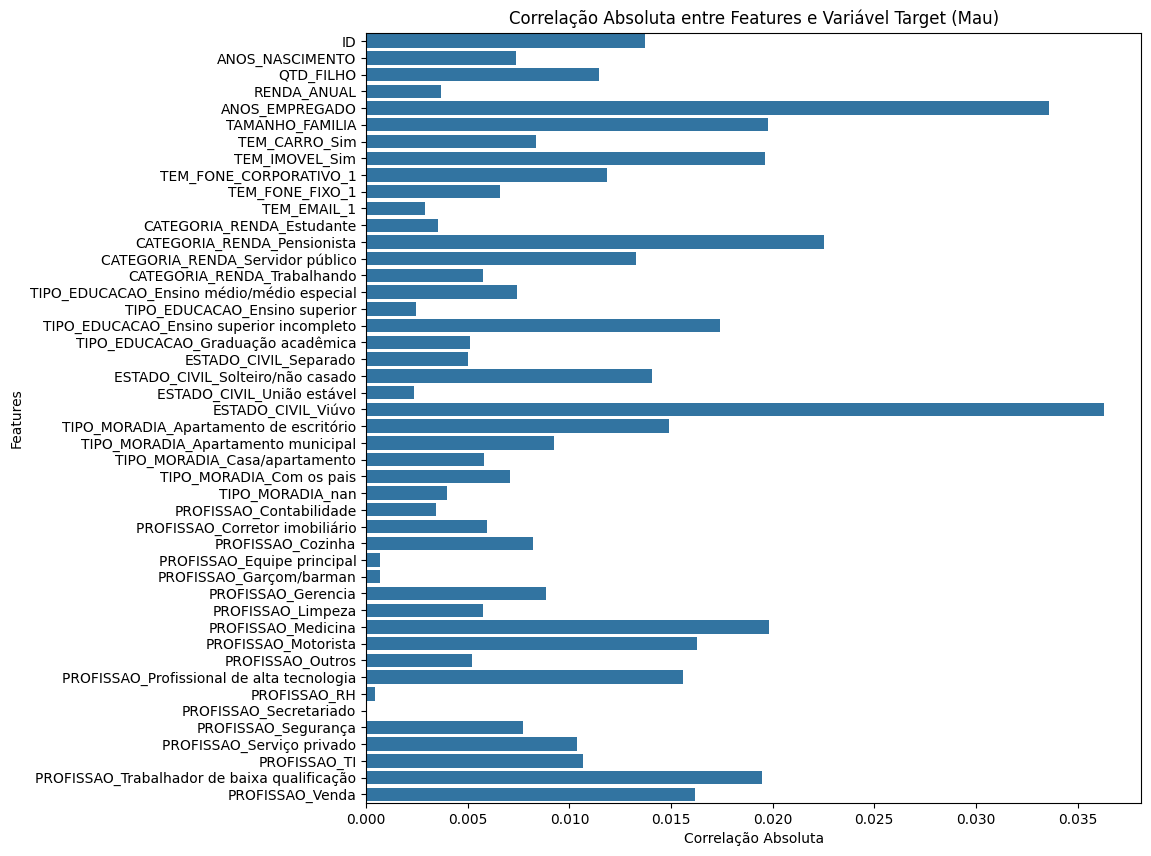

In [145]:
# Calcular a correlação entre as features e a variável target 'Mau'
corr = dados_clientes_target_encoded.corr()['Mau']

# Remover a linha 'Mau' da correlação
corr = corr.drop('Mau')

# Obter os valores absolutos da correlação
corr_abs = corr.abs()

# Criar o gráfico
plt.figure(figsize=(10, 10))
sns.barplot(x=corr_abs.values, y=corr_abs.index)
plt.title('Correlação Absoluta entre Features e Variável Target (Mau)')
plt.xlabel('Correlação Absoluta')
plt.ylabel('Features')
plt.show()


## 6.3. Elaborando função **roda_modelo** para facilitar futuros treinamentos

A função roda_modelo, foi criada para que os treinamentos de modelos sejam mais automatizados.

Basicamente esta função receberá o modelo requerido e os dados.

Internamente a função realiza:
* Separação dos dados de entrada e saída, e os separa novamente em treino e teste;
* Realiza treinamento do modelo;
* Faz uso da métrica roc_auc para calular o score;
* Calcula a probalilidade de classificação através do teste KS;
* Cria matrix de confusão;
* Gera um relatório de classificação.

Após a criação da função será explicado como as métricas utilizadas atuam.


In [146]:
SEED = 42
def roda_modelo(modelo, dados):

    # separando dados em x e y, e tambem removendo a coluna de ID
    x = dados.drop(['ID', 'Mau'], axis=1)
    y = dados.drop('ID', axis=1)['Mau']

    # Separando dados em treino e teste
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=SEED)

    # Treinando modelo com os dados de treino
    modelo.fit(x_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(x_test)
    auc = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc}")

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
    data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
    kstest = stats.ks_2samp(data_bom, data_mau)
    print(f"KS {kstest}")

    # Criando matriz de confusão
    y_pred = modelo.predict(x_test)
    ConfusionMatrixDisplay.from_estimator(modelo, x_test, y_test, display_labels=['Bons', 'Maus'], values_format='.0f')
    plt.grid(False)
    plt.show()

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(x_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

### 6.3.1. Explicando a métrica **AUC**

A métrica `AUC` (Area Under the Curve) para a **curva ROC (Receiver Operating Characteristic)**, calculada pela função `roc_auc_score` em bibliotecas como `scikit-learn`, mede a capacidade de um modelo de classificação de distinguir entre classes positivas e negativas.

1. **Curva ROC**:
   - A **ROC** é uma curva que plota a **taxa de verdadeiros positivos (TPR)** contra a **taxa de falsos positivos (FPR)** em diferentes pontos de corte (thresholds) de classificação.
   - Em resumo, a ROC analisa como o modelo se comporta ao variar o limite de decisão para prever uma classe positiva ou negativa.

   - **TPR (Taxa de verdadeiros positivos)**: É a proporção de exemplos positivos corretamente classificados.
   - **FPR (Taxa de falsos positivos)**: É a proporção de exemplos negativos incorretamente classificados como positivos.

2. **AUC (Area Under the Curve)**:
   - A **AUC** é a **área sob a curva ROC** e fornece um único valor numérico que resume a performance do modelo em separar classes positivas e negativas em todas as possibilidades de thresholds.
   - O valor de **AUC** varia de **0 a 1**:
     - **AUC = 1**: O modelo consegue separar perfeitamente as classes.
     - **AUC = 0.5**: O modelo tem um desempenho igual ao de uma escolha aleatória.
     - **AUC < 0.5**: O modelo classifica pior do que aleatoriamente, o que indicaria que as previsões estão "invertidas".

3. **roc_auc_score(y_test, prob_predic[:, 1])**:
   - **`y_test`**: Esta é a **variável real (target)** do conjunto de teste. São as classes reais (0 ou 1) para cada amostra no conjunto de teste.
   - **`prob_predic[:, 1]`**: Este parâmetro corresponde às **probabilidades preditas** para a **classe positiva** (classe 1) pelo modelo. O `[:, 1]` está selecionando a segunda coluna de `prob_predic`, que representa a probabilidade de uma amostra ser da classe positiva (1). Se o modelo estiver retornando as probabilidades para ambas as classes (0 e 1), a primeira coluna seria para a classe 0, e a segunda coluna (índice 1) seria para a classe 1.

4. **Como funciona a métrica**:
   - O `roc_auc_score` vai calcular a AUC da curva ROC para as probabilidades preditas e as classes reais.
   - Ele faz isso analisando como o modelo performa ao variar o threshold de corte para classificar exemplos como positivos ou negativos. Para cada threshold, ele calcula a TPR e a FPR, plota os pontos na curva ROC e, por fim, calcula a área sob essa curva.
   
Resumo:
- A **AUC** (Área Sob a Curva) mede o quão bem o modelo separa as classes ao variar os limiares de decisão.
- **`roc_auc_score(y_test, prob_predic[:, 1])`** usa os valores reais do conjunto de teste (`y_test`) e as **probabilidades previstas para a classe positiva** para calcular essa área.
- A métrica **AUC** ajuda a avaliar a qualidade do modelo, independentemente do threshold de classificação, o que é muito útil quando você quer ter uma visão geral da capacidade de discriminação do modelo.

### 6.3.2. Explicando a métrica **Teste KS**

O **Teste KS (Kolmogorov-Smirnov)** é uma métrica estatística utilizada para comparar duas distribuições de probabilidades e verificar se elas vêm da mesma distribuição. No contexto da classificação, o teste KS é frequentemente usado para comparar as distribuições das **probabilidades previstas** de dois grupos de classes (como **bons pagadores** e **maus pagadores**).

#### Explicação detalhada do código

1. **Separando as probabilidades**:

```python
data_bom = np.sort(modelo.predict_proba(x_test)[:, 1])
data_mau = np.sort(modelo.predict_proba(x_test)[:, 0])
```

- **`modelo.predict_proba(x_test)`**: O modelo de classificação (geralmente um modelo que retorna probabilidades, como regressão logística ou árvore de decisão) prevê as probabilidades para cada amostra de `x_test`.
  - **`[:, 1]`**: Essa parte seleciona as probabilidades associadas à classe **1** (que, no seu caso, pode representar os "bons pagadores").
  - **`[:, 0]`**: Esta parte seleciona as probabilidades associadas à classe **0** (possivelmente os "maus pagadores").

Portanto:
- **`data_bom`** contém as probabilidades de que cada exemplo no conjunto de teste pertença à classe positiva (bons pagadores).
- **`data_mau`** contém as probabilidades de que cada exemplo pertença à classe negativa (maus pagadores).

Os arrays de probabilidades são ordenados com `np.sort` para facilitar a comparação entre eles.

2. **Calculando o Teste KS**:

```python
kstest = stats.ks_2samp(data_bom, data_mau)
```

- A função **`ks_2samp`** do módulo `scipy.stats` executa o **teste Kolmogorov-Smirnov de duas amostras**, que é usado para comparar as distribuições acumuladas de duas amostras (neste caso, as probabilidades de "bons pagadores" e "maus pagadores").
  
  - **Entrada**: `data_bom` e `data_mau` (as distribuições de probabilidades para as classes 1 e 0, respectivamente).
  
  - **Resultado**: O teste KS devolve dois valores principais:
    - **`statistic`**: O valor da estatística KS, que é a **maior distância** entre as distribuições acumuladas das duas amostras. Ele quantifica o grau de separação entre as distribuições.
    - **`pvalue`**: O valor-p do teste, que indica a significância da diferença entre as duas distribuições. Se o valor-p for pequeno (geralmente < 0.05), rejeitamos a hipótese nula de que as duas distribuições são idênticas, ou seja, as distribuições são significativamente diferentes.

3. **Imprimindo o resultado**:

```python
print(f"KS {kstest}")
```

Aqui, você está imprimindo o resultado do teste KS, que inclui tanto a estatística KS quanto o valor-p.

**Interpretação do KS**:

- **Estatística KS alta**: Se o valor da estatística KS for **alto** (geralmente algo maior que 0.2 ou 20%), significa que o modelo consegue separar bem as duas classes, ou seja, as probabilidades preditas para as classes **bons pagadores** e **maus pagadores** são bem diferenciadas.
  - Um **KS de 1** indicaria uma separação perfeita, enquanto um **KS de 0** indicaria que as duas distribuições são idênticas (nenhuma separação entre as classes).

- **Valor-p**: Se o **p-valor** for **baixo** (geralmente < 0.05), isso indica que as distribuições de probabilidades dos "bons" e "maus" pagadores são significativamente diferentes, e o modelo está distinguindo bem entre as duas classes. Caso o p-valor seja maior que 0.05, indica que as distribuições não são significativamente diferentes.

#### Exemplo simplificado de KS:

Suponha que o modelo preveja as seguintes probabilidades para "bons" e "maus" pagadores:

- Para os **bons pagadores** (`data_bom`): `[0.8, 0.9, 0.7]`
- Para os **maus pagadores** (`data_mau`): `[0.3, 0.4, 0.2]`

Aqui, o **teste KS** verificaria a distância entre as distribuições acumuladas de probabilidades preditas para os dois grupos. Se houver uma grande separação (distância), a estatística KS será alta, sugerindo que o modelo diferencia bem entre as duas classes.

#### Por que o KS é importante em classificações de crédito?
No setor financeiro, o **KS** é amplamente utilizado em modelos de risco de crédito para avaliar o quão bem o modelo separa bons e maus pagadores. Um KS alto indica que o modelo é eficaz em prever a probabilidade de um cliente ser um bom ou mau pagador, o que é fundamental para a tomada de decisões como concessão de crédito ou limites de crédito.

#### Resumo:
- **`kstest = stats.ks_2samp(data_bom, data_mau)`** compara as distribuições de probabilidades preditas para "bons" e "maus" pagadores.
- O valor da **estatística KS** indica a maior distância entre as duas distribuições, ou seja, o quão bem o modelo diferencia as classes.
- Um **KS alto** indica que o modelo está separando bem os dois grupos, e um **p-valor baixo** sugere que essa separação é significativa.

## 6.4. Categorização e escalonamento dos dados

Agora que foi criada a função **roda_modelo** para acelerar o processo de treinamento, vamos fazer mais uma automação.

Conforme dito no inicio desta seção, temos variáveis contínuas e categóricas que ainda podem receber um último tratamento antes de partirmos para o treino.

Para isto será criada uma classe chamada **Transformador** que irá:
1. separar as features categóricas e aplicar o **OneHotEncoder**;
2. separar as features contínuas e aplicar o **MinMaxScaler**;
3. Unir as features tratadas em um único dataframe.

A função **OneHotEncoder**, converte variáveis categóricas em uma matriz de valores binários. Cada categoria de uma variável é transformada em uma nova coluna, onde o valor será "1" se a categoria estiver presente e "0" caso contrário, garantindo que o modelo possa processar variáveis não numéricas sem atribuir ordens numéricas equivocadas.

A função **MinMaxScaler**, por sua vez, é usada para normalizar ou escalonar os dados numéricos dentro de um intervalo específico (geralmente entre 0 e 1). Ela transforma os dados de modo que o menor valor de cada variável corresponda a 0 e o maior valor corresponda a 1, o que é útil para modelos que são sensíveis à escala das variáveis, como redes neurais.

Criação da classe **Transformador**.

1. Primeiro vamos herdar as classes **BaseEstimator** e a **TransformerMixin**.

  - A classe `BaseEstimator` é a classe base para todos os estimadores no scikit-learn. Ela oferece funcionalidades básicas como o método `get_params()` para obter os parâmetros do estimador e o método `set_params()` para definir os parâmetros. Isso é útil para integrar com outras ferramentas do scikit-learn, como busca em grade (`GridSearchCV`) e pipelines. Implementando `BaseEstimator`, você cria classes que se comportam como estimadores padrão do scikit-learn.

  - A classe `TransformerMixin` fornece uma interface para transformadores de dados, permitindo que uma classe personalizada implemente métodos como `fit()` e `transform()`. Ao herdar essa classe, você ganha a capacidade de encaixar (fit) um modelo aos dados e depois transformá-los, essencial para transformações como normalização, codificação de variáveis e extração de características, entre outras.

Juntas, essas duas classes são comumente usadas para construir novos estimadores e transformadores personalizados que podem ser usados de maneira transparente com todas as funcionalidades e pipelines do scikit-learn.

2. Depois vamos criar o método construtor **__init__** e vamos criar uma assinatura com os parametros **colunas_continuas** e **colunas_categoricas**. Vamos atribuir essas parametros a variaveis de mesmo nome.

3. Vamos instanciar o **OneHotEnconder** e o **MinMaxScaler**, criando assim os métodos **enc** e o **scaler**.

4. O proximo método que devemos criar é o **fit** e ele já tem sua assinatura padrão que é receber as variaveis **X** e **y**. Dentro do **fit** nosso objetivo é treinar nossos trasformadores **enc** e **scaler** com seus respectivos dados categoricos para o enc e continuos para o scaler. Vamos fazer isso novamente utilizando o slice na variavel X, utilizando como parametro o atributo **self.colunas_categoricas** para o **self.enc.fit** e **self.colunas_continuas** para o **self.scaler.fit**.

5. O ultimo método é o **transform** e o que vamos fazer nele é aplicar as transformações, novamente tomando o cuidado de utilizar o **slice** para pegarmos apenas os dados coerentes para cada transformador **self.enc.transform(X[self.colunas_categoricas])**, e depois criar um DataFrame com os novos dados transformados.

6. Repetimos o mesmo processo para as colunas continuas, **self.scaler.transform(X[self.colunas_continuas]**, e tambem criando o novo DataFrame **X_continuas**.

7. Agora que temos os dataframes com nossos dados transformados podemos unificar eles com o **pd.concat** e retorna o novo DataFrame com o **return X**

In [147]:
class Transformador(BaseEstimator, TransformerMixin):
    def __init__( self, colunas_continuas, colunas_categoricas):
        self.colunas_continuas = colunas_continuas
        self.colunas_categoricas = colunas_categoricas
        self.enc = OneHotEncoder()
        self.scaler = MinMaxScaler()

    def fit(self, X, y = None ):
        self.enc.fit(X[self.colunas_categoricas])
        self.scaler.fit(X[self.colunas_continuas])
        return self

    def transform(self, X, y = None):

      X_categoricas = pd.DataFrame(data=self.enc.transform(X[self.colunas_categoricas]).toarray(),
                                  columns= self.enc.get_feature_names_out(self.colunas_categoricas))

      X_continuas = pd.DataFrame(data=self.scaler.transform(X[self.colunas_continuas]),
                                  columns= self.colunas_continuas)

      X = pd.concat([X_continuas, X_categoricas], axis=1)

      return X

## 6.5. Criação do Pipeline

Construimos nossa classe transformadora para aplicar no dataframe, de modo que possamos utilizar o recurso do pipeline.

O **`Pipeline`** do scikit-learn é uma ferramenta poderosa que organiza uma sequência de transformações e um modelo preditivo em um fluxo de trabalho coeso, garantindo que essas etapas sejam executadas de maneira sequencial e automática.

Aqui está como ele funciona:

1. **Sequenciamento de Etapas**: O `Pipeline` permite definir uma sequência de passos, onde cada passo pode ser um transformador (por exemplo, `StandardScaler`, `MinMaxScaler`, `OneHotEncoder`) ou um estimador (como `LinearRegression` ou `LogisticRegression`). Todas as transformações são aplicadas sequencialmente aos dados de entrada.

2. **Fit e Transform**: Quando você chama o método `fit()` no `Pipeline`, ele executa o método `fit()` para cada etapa da sequência, exceto para o último, que será o estimador final. Para as etapas intermediárias, ele também executa o método `transform()`, passando os dados transformados para a próxima etapa. O último passo é o modelo preditivo, no qual o método `fit()` finaliza o ajuste.

3. **Previsão**: Após a execução do `fit()`, quando você chama o método `predict()` no `Pipeline`, ele passa os dados de entrada pela sequência de transformadores até chegar ao modelo, que gera as previsões.

4. **Facilidade em Ajustar Hiperparâmetros**: O `Pipeline` facilita a busca de hiperparâmetros em um processo automático, usando ferramentas como `GridSearchCV` e `RandomizedSearchCV`. Isso permite otimizar os parâmetros tanto dos transformadores quanto do modelo final em uma única execução.

**Benefícios:**
- **Simplificação do Código**: Reduz a quantidade de código, eliminando a necessidade de ajustar e transformar manualmente os dados em várias etapas.
- **Garantia de Processamento Consistente**: Garante que as mesmas transformações usadas no treinamento dos dados sejam aplicadas aos dados de teste.
- **Integração com Busca de Hiperparâmetros**: Permite realizar otimização de parâmetros de forma simples e integrada com `GridSearchCV` ou `RandomizedSearchCV`.

Agora com a pipeline, transformador e função roda_modelo prontos, vamos aplicar o modelo LogisticRegression apenas para testar se todos estão rodando conforme esperado.

AUC 0.5984824699110414
KS KstestResult(statistic=1.0, pvalue=0.0, statistic_location=0.13403154812144255, statistic_sign=1)


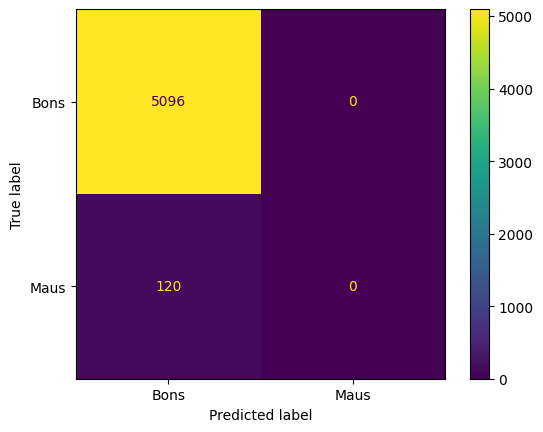


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5096
           1       0.00      0.00      0.00       120

    accuracy                           0.98      5216
   macro avg       0.49      0.50      0.49      5216
weighted avg       0.95      0.98      0.97      5216



In [148]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])
roda_modelo(pipeline, dados_clientes_target)

Esse tipo de resultado indica a necessidade de técnicas mais sofisticadas, como **reestruturação do conjunto de dados** (usando oversampling, undersampling) ou o uso de modelos que levem em conta o desbalanceamento para melhorar a identificação da classe minoritária.

## 6.6. Corrigindo o problema de desbalanceamento de dados

Conforme foi visto na seção 4, o conjunto de dados final se encontra bem desbalanceado.

In [149]:
dados_clientes_target['Mau'].value_counts(normalize=True)*100

,proportion
Mau,
0,97.694373
1,2.305627


Para corrigir este problema, podemos utilizar as técnicas de **Oversampling** e **Undersampling**. Estas técnicas usadas para lidar com dados desbalanceados em problemas de classificação.

- **Oversampling**: Aumenta o número de exemplos da classe minoritária. Uma técnica comum é o *SMOTE* (Synthetic Minority Over-sampling Technique), que cria novos exemplos sintéticos da classe minoritária com base nos já existentes. O objetivo é equilibrar o número de exemplos das classes.

- **Undersampling**: Reduz o número de exemplos da classe majoritária, removendo alguns dados dessa classe para que o conjunto de dados fique mais balanceado. Isso pode ser arriscado, pois pode-se perder informações importantes.

Ambas as técnicas ajudam a melhorar a performance de modelos que lidam com classes desbalanceadas. Para o nosso caso, aplicar o undersampling irá reduzir muito a quantidade de dados da base, fazendo com que o modelo não tenha capacidade de explicar todas as nuancias do problema.

Vale lembrar que as técnicas de **oversampling** e **undersampling** devem ser aplicadas **apenas aos dados de treino** porque o objetivo delas é ajustar o modelo para aprender melhor a partir de dados desbalanceados. Se essas técnicas fossem aplicadas aos dados de teste, isso introduziria viés e invalidaria o propósito de testar o desempenho do modelo em dados que ele não viu antes.

Vamos testar novamente a mesma pipeline, só que aplicando previamente o sampling para avaliar os resultados.

AUC 0.5880886970172685
KS KstestResult(statistic=0.16219325153374234, pvalue=2.82372213328857e-60, statistic_location=0.459844987503704, statistic_sign=1)


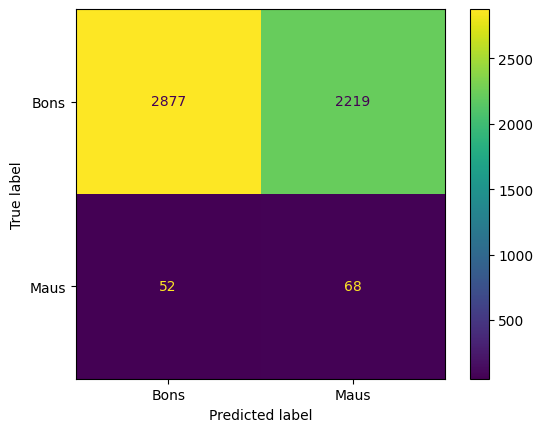


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.56      0.72      5096
           1       0.03      0.57      0.06       120

    accuracy                           0.56      5216
   macro avg       0.51      0.57      0.39      5216
weighted avg       0.96      0.56      0.70      5216



In [150]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])
roda_modelo(pipeline, dados_clientes_target)

**O modelo com SMOTE** oferece uma classificação muito mais equilibrada, embora a **accuracy** tenha diminuído. Ele é mais eficaz em prever a classe minoritária ("Maus"), o que é crucial em casos de desbalanceamento de classes.

**Já o modelo sem balanceamento** é ineficiente para prever a classe minoritária e apenas foca na classe majoritária, resultando em uma alta accuracy enganosa.


# 7. Aplicação de Modelos de Aprendizado de Máquina

In [151]:
def roda_cv_modelo(modelo: list, dados, n_splits, n_repeats, valor_corte=0.95):

  np.random.seed(42) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem

  # separando dados em x e y, e tambem removendo a coluna de ID
  x = dados.drop(['ID', 'Mau'], axis=1)
  y = dados.drop('ID', axis=1)['Mau']

  resultados_lista = []
  auc_media_lista = []
  for i in range(len(modelo)):
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
    resultados = cross_validate(modelo[i], x, y, cv=cv, scoring='roc_auc') #teste score retorna como padrão a acurácia, com o "scoring='roc_auc'" nós garantimos que o retorno do teste score seja a AUC

    #Média e Desvio Padrão
    auc_media = np.mean(resultados['test_score'])
    auc_std = np.std(resultados['test_score'])
    print(f"AUC Médio do Modelo {type(modelo[i]).__name__}: {auc_media:.4f}")
    print(f"Intervalo do Modelo {type(modelo[i]).__name__}: [{(auc_media - 2*auc_std):.4f},{(auc_media + 2*auc_std):.4f}]")
    print(f"Diferença: {4*auc_std:.4f}\n")
    auc_media_lista.append(auc_media)

  if len(modelo) > 1:
    print('Melhor modelo:')
    print(f'{type(modelo[np.argmax(auc_media_lista)]).__name__}')
    print(f'AUC Médio do Modelo {type(modelo[i]).__name__}: {np.amax(auc_media_lista):.4f}')

  return modelo[np.argmax(auc_media_lista)]

In [152]:
pipe_LogReg = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', LogisticRegression(random_state=SEED, max_iter=1000))])
pipe_RandomForest = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])
pipe_XGB = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', XGBClassifier(random_state=SEED))])
pipe_CatBoost = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', CatBoostClassifier(random_state=SEED))])
pipe_LGBM = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', lgb.LGBMClassifier(random_state=SEED, force_row_wise=True))])
modelo_vencedor = roda_cv_modelo([pipe_LogReg, pipe_RandomForest, pipe_XGB, pipe_CatBoost, pipe_LGBM], dados_clientes_target, 5, 10)

A saída de streaming foi truncada nas últimas 5000 linhas.
414:	learn: 0.1196665	total: 12.9s	remaining: 18.2s
415:	learn: 0.1194139	total: 12.9s	remaining: 18.1s
416:	learn: 0.1193276	total: 12.9s	remaining: 18.1s
417:	learn: 0.1189442	total: 13s	remaining: 18s
418:	learn: 0.1186637	total: 13s	remaining: 18s
419:	learn: 0.1184016	total: 13s	remaining: 18s
420:	learn: 0.1181037	total: 13s	remaining: 17.9s
421:	learn: 0.1179997	total: 13.1s	remaining: 17.9s
422:	learn: 0.1178122	total: 13.1s	remaining: 17.9s
423:	learn: 0.1176590	total: 13.1s	remaining: 17.8s
424:	learn: 0.1173998	total: 13.1s	remaining: 17.8s
425:	learn: 0.1171046	total: 13.2s	remaining: 17.7s
426:	learn: 0.1167013	total: 13.2s	remaining: 17.7s
427:	learn: 0.1165722	total: 13.2s	remaining: 17.6s
428:	learn: 0.1164250	total: 13.2s	remaining: 17.6s
429:	learn: 0.1162734	total: 13.3s	remaining: 17.6s
430:	learn: 0.1161514	total: 13.3s	remaining: 17.5s
431:	learn: 0.1158081	total: 13.3s	remaining: 17.5s
432:	learn: 0.11570

AUC 0.7734783817373103
KS KstestResult(statistic=0.9647239263803681, pvalue=0.0, statistic_location=0.43, statistic_sign=1)


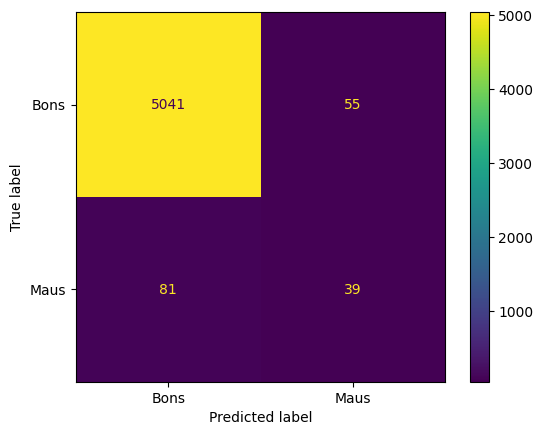


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5096
           1       0.41      0.33      0.36       120

    accuracy                           0.97      5216
   macro avg       0.70      0.66      0.68      5216
weighted avg       0.97      0.97      0.97      5216



In [153]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', RandomForestClassifier(random_state=SEED))])
roda_modelo(pipeline, dados_clientes_target)

AUC 0.7127428375196232
KS KstestResult(statistic=0.9587806748466258, pvalue=0.0, statistic_location=0.4446024, statistic_sign=1)


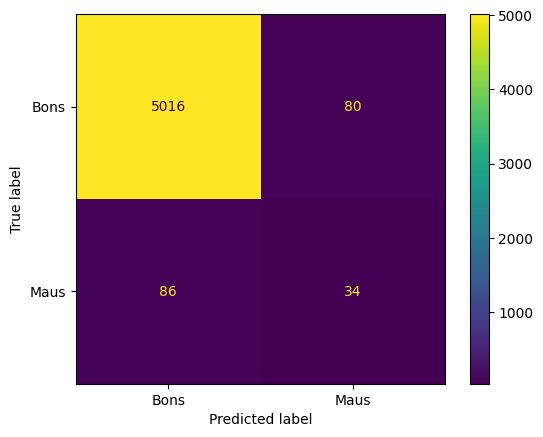


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5096
           1       0.30      0.28      0.29       120

    accuracy                           0.97      5216
   macro avg       0.64      0.63      0.64      5216
weighted avg       0.97      0.97      0.97      5216



In [154]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', XGBClassifier(eval_metric='mlogloss'))])
roda_modelo(pipeline, dados_clientes_target)

AUC 0.6405980180533752
KS KstestResult(statistic=0.9624233128834356, pvalue=0.0, statistic_location=0.4984725957942598, statistic_sign=1)


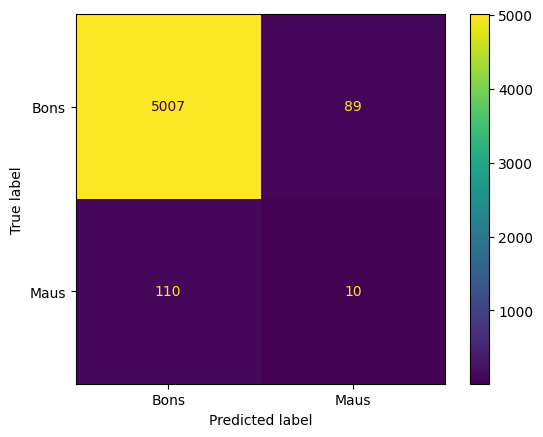


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5096
           1       0.10      0.08      0.09       120

    accuracy                           0.96      5216
   macro avg       0.54      0.53      0.54      5216
weighted avg       0.96      0.96      0.96      5216



In [155]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, verbose=False))])
roda_modelo(pipeline, dados_clientes_target)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 15285, number of negative: 15285
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 10711
[LightGBM] [Info] Number of data points in the train set: 30570, number of used features: 53
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AUC 0.7195782639979069
KS KstestResult(statistic=0.9505368098159509, pvalue=0.0, statistic_location=0.46552166191173755, statistic_sign=1)


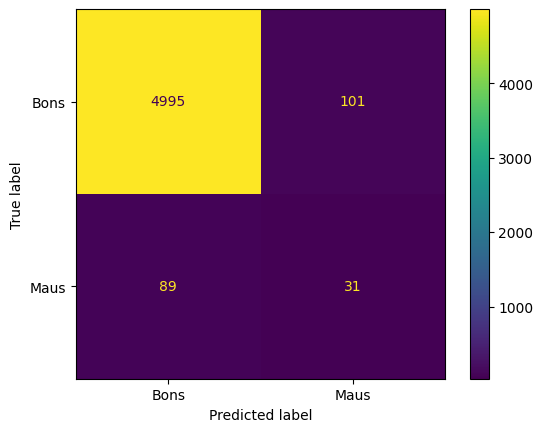


Classification Report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      5096
           1       0.23      0.26      0.25       120

    accuracy                           0.96      5216
   macro avg       0.61      0.62      0.61      5216
weighted avg       0.97      0.96      0.96      5216



In [156]:
pipeline = Pipeline([('Transformador', Transformador(colunas_continuas, colunas_categoricas)),
                     ('sampling', SMOTE(random_state=SEED)),
                     ('Modelo', lgb.LGBMClassifier(force_row_wise=True))])
roda_modelo(pipeline, dados_clientes_target)

In [157]:
def tuning_hyperparameter(modelo, dados, n_splits, n_repeats, param_grid, valor_corte=0.95):
  np.random.seed(42) # seed para garantir a reprodutibilidade do teste
  dados = dados.sample(frac=1).reset_index(drop=True) #embaralha os dados recebidos para evitar viés de ordem

  # separando dados em x e y, e tambem removendo a coluna de ID
  x = dados.drop(['ID', 'Mau'], axis=1)
  y = dados.drop('ID', axis=1)['Mau']

  cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats = n_repeats)
  clf = GridSearchCV(modelo, param_grid= param_grid, cv = cv, scoring='roc_auc', return_train_score=True)

  best_clf = clf.fit(x, y)

  return best_clf.best_estimator_

In [ ]:
param_grid_LogReg = [
    {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': np.arange(100,1100,100)
    }
]
pipe_LogReg_tuned = tuning_hyperparameter(pipe_LogReg, dados_clientes_target, 5, 10, param_grid_LogReg)
pipe_LogReg_tuned

In [ ]:
param_grid_RandomForest = [
    {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False],
        'criterion': ['gini', 'entropy'],
        'class_weight': [None, 'balanced', 'balanced_subsample']
    }
]
pipe_RandomForest_tuned = tuning_hyperparameter(pipe_RandomForest, dados_clientes_target, 5, 10, param_grid_RandomForest)
pipe_RandomForest_tuned

In [ ]:
param_grid_XGB = [
    {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.1, 0.3],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'scale_pos_weight': [1, 5, 10],
        'reg_alpha': [0, 0.01, 0.1],
        'reg_lambda': [0, 0.01, 0.1]
    }
]
pipe_XGB_tuned = tuning_hyperparameter(pipe_XGB, dados_clientes_target, 5, 10, param_grid_XGB)
pipe_XGB_tuned

In [ ]:
param_grid_CatBoost = [
    {
        'iterations': [200, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1],
        'depth': [4, 6, 8, 10],
        'l2_leaf_reg': [3, 5, 7],
        'bagging_temperature': [0, 0.5, 1],
        'random_strength': [1, 5, 10],
        'subsample': [0.8, 1.0],
        'scale_pos_weight': [1, 5, 10],
        'colsample_bylevel': [0.8, 1.0]
    }
]
pipe_CatBoost_tuned = tuning_hyperparameter(pipe_CatBoost, dados_clientes_target, 5, 10, param_grid_CatBoost)
pipe_CatBoost_tuned

In [ ]:
param_grid_LGBM = [
    {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [31, 50, 70],
        'max_depth': [3, 5, 7, -1],
        'min_child_samples': [20, 50, 100],
        'min_child_weight': [0.001, 0.01, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0],
        'reg_alpha': [0, 0.1, 0.5],
        'reg_lambda': [0, 0.1, 0.5],
        'scale_pos_weight': [1, 5, 10]
    }
]
pipe_LGBM_tuned = tuning_hyperparameter(pipe_LGBM, dados_clientes_target, 5, 10, param_grid_LGBM)
pipe_LGBM_tuned

# 8. Avaliação dos Modelos de Aprendizado de Máquina e Discussão dos Resultados

# 9. Conclusão

# 10. Links

# 11. Referências